# OLYMPICS SPORT ANALYSIS

# Brief History of Olympics (1896 to 2024)

## The Revival and Early Years (1896-1920s)
## The modern Olympic Games were revived in 1896 in Athens, Greece, by Pierre de Coubertin, inspired by the ancient Greek games. The first edition featured 241 athletes from 14 countries, competing in 43 events. Initially, the Olympics were a modest affair, focused on promoting peace and unity through sport. The early editions were held in various European cities and featured only a few sports, primarily focusing on athletics, swimming, gymnastics, and cycling.

## Growth and Challenges (1930s-1940s)
## The Olympics gained popularity, and the number of participating countries and athletes steadily increased. However, the Games faced significant challenges, including being used as a platform for political propaganda. The 1936 Berlin Olympics, held under Nazi Germany, are the most notable example, where Adolf Hitler sought to showcase Aryan supremacy, though Jesse Owens, an African American athlete, won four gold medals, challenging these notions. The Games were halted during World War II (1940 and 1944), marking the only cancellations in Olympic history.

## Expansion and Globalization (1950s-1980s)
## Post-war, the Olympics entered a new era of expansion and globalization. The inclusion of television broadcasting in the 1960 Rome Olympics brought the Games to a global audience, significantly boosting their popularity. The Olympic movement also expanded to include more sports and events, with the participation of more nations from around the world, including newly independent countries from Africa and Asia. However, the period was also marked by political tensions, leading to boycotts in the 1980 (Moscow) and 1984 (Los Angeles) Games during the Cold War.

## Commercialization and Modern Era (1990s-2024)
## The 1990s saw the Olympics become increasingly commercialized, with corporate sponsorships and broadcasting rights generating substantial revenue. The International Olympic Committee (IOC) introduced new events and sports, making the Games more inclusive and diverse. The introduction of the Paralympics and Youth Olympics also expanded the Olympic movement. In recent years, the Games have faced challenges, including the COVID-19 pandemic, which led to the postponement of the Tokyo 2020 Olympics to 2021. Looking ahead, the 2024 Paris Olympics will continue the tradition of innovation, with plans to include new sports and sustainability initiatives.

In [1]:
# import all important software needed to perform the neccessary functions

import numpy as np
import pandas as pd  ##for data manipulation
pd.set_option('display.max_columns', 50) #to show all column headings in the dataframe
import matplotlib.pyplot as plt     #for graphical display and manipulaiton
import seaborn as sns              
%matplotlib inline                 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\User\Downloads\archive (4)\olympics_dataset.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252565 entries, 0 to 252564
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   player_id  252565 non-null  int64 
 1   Name       252565 non-null  object
 2   Sex        252565 non-null  object
 3   Team       252565 non-null  object
 4   NOC        252565 non-null  object
 5   Year       252565 non-null  int64 
 6   Season     252565 non-null  object
 7   City       252565 non-null  object
 8   Sport      252565 non-null  object
 9   Event      252565 non-null  object
 10  Medal      252565 non-null  object
dtypes: int64(2), object(9)
memory usage: 21.2+ MB


In [4]:
# Missing Data/Values
df.isna().sum()

player_id    0
Name         0
Sex          0
Team         0
NOC          0
Year         0
Season       0
City         0
Sport        0
Event        0
Medal        0
dtype: int64

### This indicates that there is no missing data and data is totally cleaned

In [5]:
df.tail()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
252560,4986655,Sefora Ada,F,Equatorial Guinea,GEQ,2024,Summer,Paris,Athletics,Women's 100m,No medal
252561,9460001,Emanuela Liuzzi,F,Italy,ITA,2024,Summer,Paris,Wrestling,Women's Freestyle 50kg,No medal
252562,1972077,Isayah Boers,M,Netherlands,NED,2024,Summer,Paris,Athletics,4 x 400m Relay Mixed,Gold
252563,1899865,Kevin Staut,M,France,FRA,2024,Summer,Paris,Equestrian,Jumping Team,Bronze
252564,1924402,Charlie Carvell,M,Great Britain,GBR,2024,Summer,Paris,Athletics,Men's 4 x 400m Relay,Bronze


# Main Objective: Trends and patterns in Olympic performances

## Medal Distribution by Year and Country

In [6]:
# Question: How has the number of medals won by different countries changed over the years?
# Intution: To get how different countries won models and it changes over time

In [7]:
# Group the data by Year and NOC (National Olympic Committee) and count the number of medals.
# Remove any duplicates to ensure each row is a unique medal
df = df.drop_duplicates(subset=['Year', 'NOC', 'Medal'])

# Group by Year and NOC, and count the number of medals
medal_counts = df.groupby(['Year', 'NOC']).size().reset_index(name='Medal_Count')

In [8]:
# Create a pivot table with Years as rows, Countries (NOC) as columns, and Medal Counts as values
medal_pivot = medal_counts.pivot(index='Year', columns='NOC', values='Medal_Count').fillna(0)

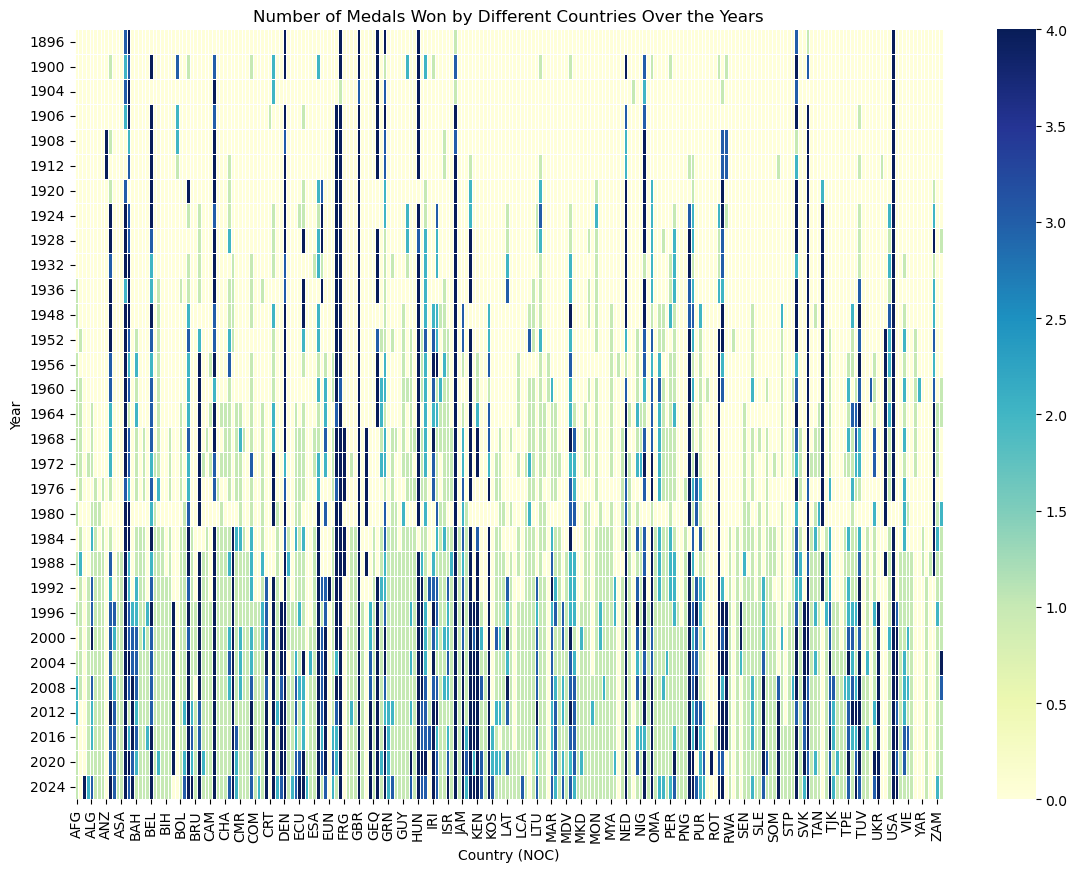

In [9]:
# Plotting the results using a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(medal_pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Number of Medals Won by Different Countries Over the Years')
plt.xlabel('Country (NOC)')
plt.ylabel('Year')
plt.show()

## The visual shows the number of Olympic medals won by different countries (represented by their National Olympic Committee codes) over the years, from the first modern Olympics in 1896 to 2024. The X-axis shows the countries, while the Y-axis represents the years. The color intensity indicates the number of medals won, with darker colors representing more medals and lighter colors representing fewer or no medals.

## Key patterns emerge from the data, showing that some countries like the USA, USSR/Russia, and Germany have consistently performed well, indicated by dark vertical bands throughout many Olympic years. These countries dominate the medal count, reflecting their strong and sustained athletic programs. In contrast, other nations may have lighter colors, indicating fewer medals or periods of non-participation, which could be due to historical events like wars or political boycotts.

## This also highlights how some countries have risen as Olympic powers over time, with their colors darkening in more recent years, while others have seen a decline. It provided a visual summary of the changing landscape of global athletic competition, capturing both the enduring dominance of traditional powerhouses and the emergence of new contenders on the Olympic stage.

## Top Performing Countries

In [10]:
# Question: Which countries have won the most medals overall, and how does this distribution change when considering only Gold, Silver, or Bronze medals?

# Count total medals by country
total_medals = df.groupby('NOC').size().reset_index(name='Total_Medals')

# count medals ny type and country
medal_type = df.groupby(['NOC', 'Medal']).size().reset_index(name='Medal_Count')

In [11]:
# Filter for Gold, Silver, and Bronze separately
gold_medals = medal_type[medal_type['Medal'] == 'Gold'] # for Gold
silver_medals = medal_type[medal_type['Medal'] == 'Silver'] # for silver 
bronze_medals = medal_type[medal_type['Medal'] == 'Bronze'] # for bronze

In [12]:
# Sort and select the top 10 countries for each medal type
top_total_medal = total_medals.sort_values(by='Total_Medals', ascending=False).head(10) # sort by medal (all medals)
gold_total_medal = gold_medals.sort_values(by='Medal_Count', ascending=False).head(10)  # sort by medal (gold)
silver_total_medal = silver_medals.sort_values(by='Medal_Count', ascending=False).head(10)  # sort by medal (silver)
bronze_total_medal = bronze_medals.sort_values(by='Medal_Count', ascending=False).head(10)  # sort by medal (bronze)

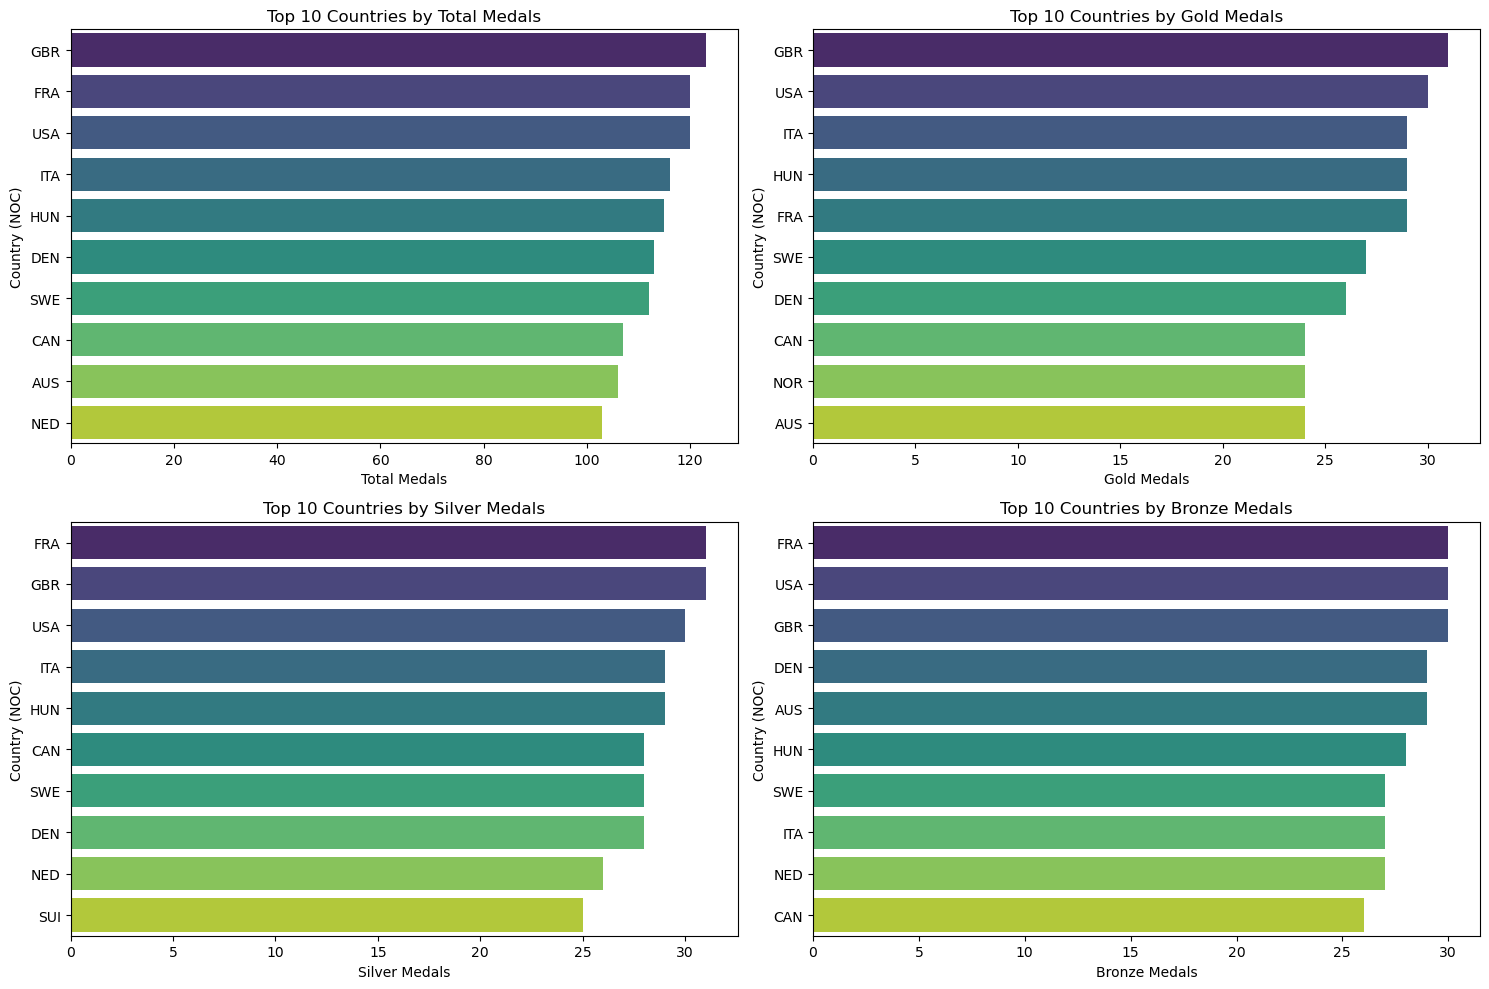

In [13]:
# Plot graph
plt.figure(figsize=(15, 10))

# Total Medals Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Total_Medals', y='NOC', data=top_total_medal, palette='viridis') # barplot using seaborn
plt.title('Top 10 Countries by Total Medals') # title
plt.xlabel('Total Medals') # x label
plt.ylabel('Country (NOC)') #y_label

# Gold Medals Plot
plt.subplot(2, 2, 2)
sns.barplot(x='Medal_Count', y='NOC', data=gold_total_medal, palette='viridis')
plt.title('Top 10 Countries by Gold Medals')
plt.xlabel('Gold Medals')
plt.ylabel('Country (NOC)')

# Silver Medals Plot
plt.subplot(2, 2, 3)
sns.barplot(x='Medal_Count', y='NOC', data=silver_total_medal, palette='viridis')
plt.title('Top 10 Countries by Silver Medals')
plt.xlabel('Silver Medals')
plt.ylabel('Country (NOC)')

# Bronze Medals Plot
plt.subplot(2, 2, 4)
sns.barplot(x='Medal_Count', y='NOC', data=bronze_total_medal, palette='viridis')
plt.title('Top 10 Countries by Bronze Medals')
plt.xlabel('Bronze Medals')
plt.ylabel('Country (NOC)')

plt.tight_layout()
plt.show()

## The image displays four bar charts, each representing the top 10 countries by the number of total, gold, silver, and bronze medals won in the Olympic Games. These charts provide a clear comparison of which nations have excelled in each category of medals.

## Top 10 Countries by Total Medals

## The first chart highlights the overall medal performance, with Great Britain (GBR) leading, followed closely by France (FRA) and the United States (USA). These countries have accumulated over 100 medals each, reflecting their success across multiple Olympic Games.

## Top 10 Countries by Gold Medals

## In terms of gold medals, Great Britain (GBR) once again takes the top spot, followed by the USA and Italy (ITA). This indicates not only high participation but also a strong ability to convert those appearances into first-place finishes. Countries like Hungary (HUN) and France (FRA) also show strong performances in securing gold medals.

## Top 10 Countries by Silver Medals

## France (FRA) leads in the silver medal count, slightly ahead of Great Britain (GBR) and the USA. This chart reflects the ability of these nations to consistently reach the finals in various events, often finishing just short of gold. Italy (ITA) and Hungary (HUN) are also prominent in this category, highlighting their strong competitive spirit.

## Top 10 Countries by Bronze Medals

## For bronze medals, France (FRA) again leads, followed by the USA and Great Britain (GBR). The distribution of bronze medals indicates the depth of talent in these countries, where athletes consistently reach the podium, even if not always in the top two positions. Countries like Denmark (DEN), Australia (AUS), and Hungary (HUN) also feature prominently.

## Overall, the charts depict a clear dominance by countries like Great Britain, France, and the USA across all types of medals. These nations not only participate widely but also have the ability to win across a variety of events. The presence of countries like Italy, Hungary, and Australia across all charts also points to their strong Olympic traditions and ability to compete at the highest levels.

# Medal Trends by Gender

In [14]:
# Group the data by Year, Medal and Sex and count the number of medals won.

# Group by Year and NOC, and count the number of medals
medal_counts = df.groupby(['Year', 'Sex', 'Medal']).size().reset_index(name='Medal_Count') #'Year', 'Sex', 'Medal', and the corresponding count of medals ('Medal_Count').

In [15]:
# Group again by Year and Sex to get total medals won by each gender per year
total_medal_gender = medal_counts.groupby(['Year', 'Sex'])['Medal_Count'].sum().reset_index()

In [16]:
# Pivot the data to have Years as rows and Sex as columns, with Medal_Count as values
pivot_medals = total_medal_gender.pivot(index='Year', columns='Sex', values='Medal_Count').fillna(0)

In [17]:
pivot_medals

Sex,F,M
Year,,
1896,0.0,40.0
1900,3.0,72.0
1904,0.0,40.0
1906,0.0,68.0
1908,1.0,67.0
1912,5.0,73.0
1920,0.0,81.0
1924,5.0,110.0
1928,10.0,113.0


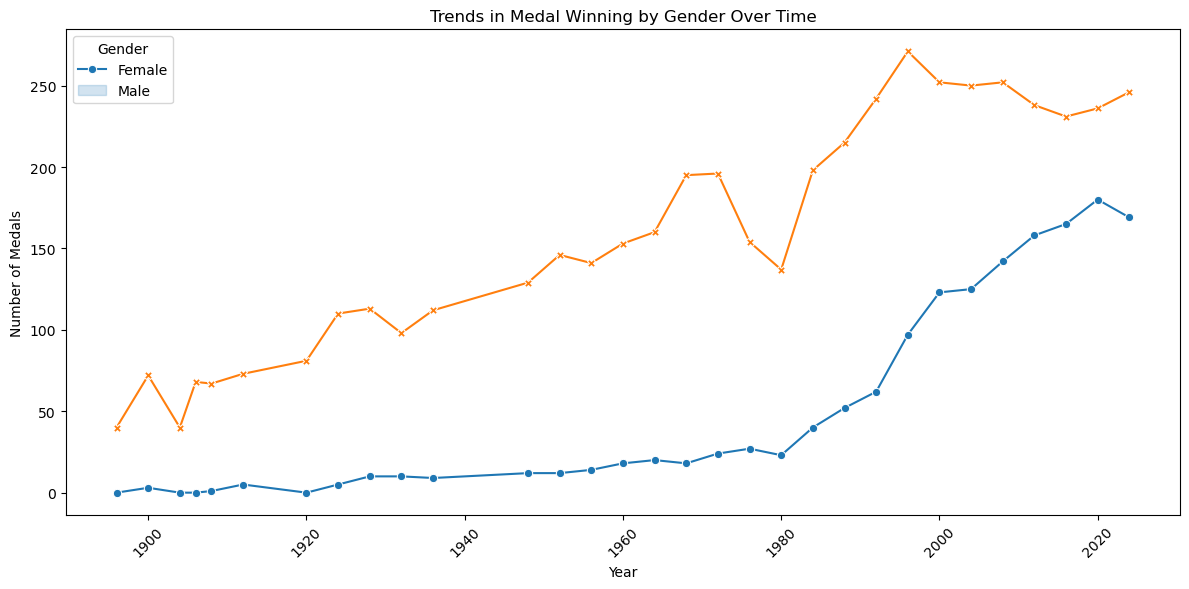

In [18]:
# Plotting the results using line charts
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_medals, markers=True, dashes=False)
plt.title('Trends in Medal Winning by Gender Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The line chart displays the trends in the number of Olympic medals won by male and female athletes over time, spanning from the early 1900s to 2020. 

# Male Athletes' Medal Trends

## The orange line, representing male athletes, shows a general upward trend over the years, indicating an increase in the number of medals won. Starting from around 50 medals in the early 1900s, the number steadily rises, reaching over 250 medals by the 1980s. Although there are fluctuations, particularly during the mid-20th century, the overall trajectory is one of growth, peaking around 2000, after which the trend stabilizes slightly.

# Female Athletes' Medal Trends

## The blue line, representing female athletes, starts much lower, with minimal medals won in the early 1900s. However, the trend shows a significant increase beginning around the 1970s, corresponding with global efforts to promote gender equality in sports. The number of medals continues to rise sharply, reaching over 100 medals by 2020, closing the gap with male athletes over time.

# Comparison of Trends

## While male athletes have historically won more medals, the gap between male and female athletes has been narrowing, particularly from the 1970s onward. This reflects broader societal changes and increased opportunities for women in sports. By 2020, although male athletes still win more medals overall, female athletes have made significant strides in increasing their medal count.

# Impact of Historical Events

## The chart also reflects the impact of historical events on the Olympic Games. For example, there are noticeable dips during the periods around World Wars I and II, where the number of medals won decreased due to the cancellation of some Olympic Games. The resurgence in medal counts post-war periods corresponds with the resumption and expansion of the Games.

## Overall, the chart illustrates a clear trend of increasing participation and success in the Olympics for both male and female athletes, with a particularly notable rise in female athletes' achievements from the latter half of the 20th century onwards. This trend highlights the progress made in gender equality in sports and the growing prominence of female athletes on the world stage.

## Performance in Specific Sports

In [19]:
# Question: Which sports have seen the highest number of medal wins, and how has this changed over time?

In [20]:
# Group by Year and sport, and count the number of medals
medal_sport = df.groupby(['Year', 'Sport', 'Medal']).size().reset_index(name='Medal_Count')

# Group again by Year and Sport to get total medals won by each sport per year
total_medal_sport = medal_sport.groupby(['Year', 'Sport'])['Medal_Count'].sum().reset_index()

# Pivot the data to have Years as rows and Sex as columns, with Medal_Count as values
pivot_medal_sport = total_medal_sport.pivot(index='Year', columns='Sport', values='Medal_Count').fillna(0)

pivot_medal_sport

Sport,3x3 Basketball,Archery,Art Competitions,Artistic Gymnastics,Artistic Swimming,Athletics,Badminton,Baseball,Baseball/Softball,Basketball,Basque Pelota,Beach Volleyball,Boxing,Breaking,Canoe Slalom,Canoe Sprint,Canoeing,Cricket,Cycling,Cycling BMX Freestyle,Cycling BMX Racing,Cycling Mountain Bike,Cycling Road,"Cycling Road, Cycling Track",Cycling Track,...,Modern Pentathlon,Polo,Rhythmic Gymnastics,Rowing,Rugby,Rugby Sevens,Sailing,Shooting,Skateboarding,Softball,Sport Climbing,Surfing,Swimming,Synchronized Swimming,Table Tennis,Taekwondo,Tennis,Trampoline Gymnastics,Trampolining,Triathlon,Tug-Of-War,Volleyball,Water Polo,Weightlifting,Wrestling
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
1900,0.0,1.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,7.0,3.0,0.0,3.0,8.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0
1906,0.0,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,5.0
1908,0.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,2.0,6.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0
1912,0.0,0.0,6.0,0.0,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,0.0,0.0,5.0,6.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,3.0
1920,0.0,3.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,0.0,3.0,10.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,3.0,5.0
1924,0.0,0.0,9.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,0.0,4.0,2.0,0.0,3.0,9.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,6.0,7.0
1928,0.0,0.0,6.0,0.0,0.0,31.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,8.0


In [21]:
# Find the top sports with the highest total number of medals
top_sports = total_medal_sport.groupby('Sport')['Medal_Count'].sum().nlargest(10).index

# Filter the data to include only the top sports
top_sports_data = total_medal_sport[total_medal_sport['Sport'].isin(top_sports)]

# Pivot the data to have Years as rows and Sports as columns, with Medal_Count as values
pivot_sports = top_sports_data.pivot(index='Year', columns='Sport', values='Medal_Count').fillna(0)

In [22]:
pivot_sports

Sport,Athletics,Boxing,Cycling,Judo,Rowing,Sailing,Shooting,Swimming,Weightlifting,Wrestling
Year,,,,,,,,,,
1896,10.0,0.0,5.0,0.0,0.0,0.0,3.0,5.0,3.0,0.0
1900,19.0,0.0,1.0,0.0,7.0,3.0,8.0,6.0,0.0,0.0
1904,9.0,0.0,2.0,0.0,2.0,0.0,0.0,9.0,1.0,1.0
1906,20.0,0.0,5.0,0.0,3.0,0.0,7.0,5.0,0.0,5.0
1908,16.0,2.0,2.0,0.0,0.0,2.0,6.0,4.0,0.0,8.0
1912,26.0,0.0,0.0,0.0,5.0,5.0,6.0,7.0,0.0,3.0
1920,14.0,4.0,4.0,0.0,3.0,3.0,10.0,5.0,3.0,5.0
1924,21.0,8.0,7.0,0.0,4.0,3.0,9.0,7.0,6.0,7.0
1928,31.0,5.0,6.0,0.0,6.0,4.0,0.0,11.0,3.0,8.0


<Figure size 1400x800 with 0 Axes>

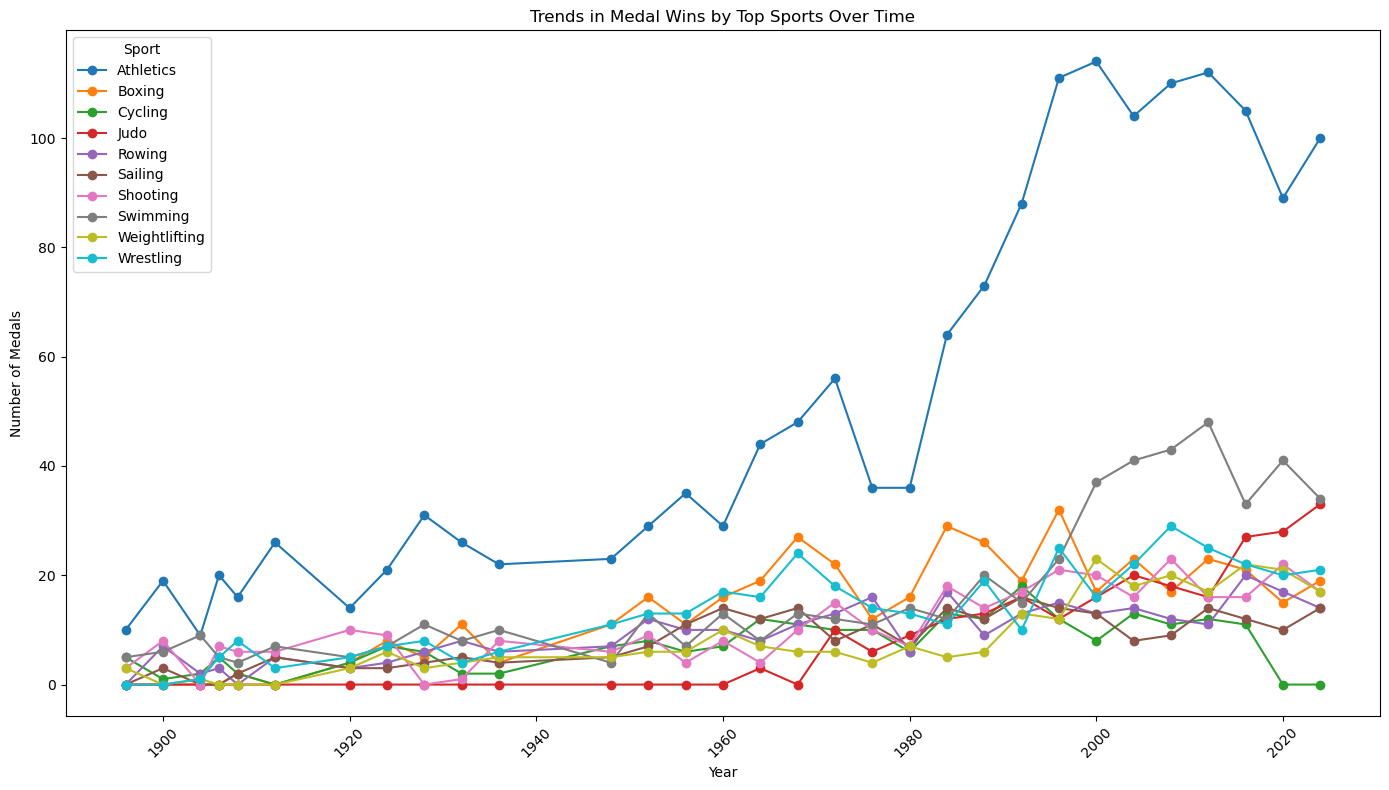

In [23]:
# Plotting the results using line charts for top sports over time
plt.figure(figsize=(14, 8))
pivot_sports.plot(kind='line', marker='o', figsize=(14, 8))
plt.title('Trends in Medal Wins by Top Sports Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.legend(title='Sport', loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The line chart illustrates the trends in medal wins for the top sports over time, likely within the context of the Olympics. Several notable trends emerge from the chart. Athletics consistently dominates the medal count, maintaining a significant lead over other sports throughout the depicted period. Boxing, Cycling, Judo, and Swimming also demonstrate a strong presence, with fluctuating medal tallies over the years. Other sports like Rowing, Sailing, Shooting, Weightlifting, and Wrestling exhibit more sporadic medal wins, suggesting varying levels of competitive success.

## The chart highlights the dynamic nature of sports performance, with the medal count for individual sports fluctuating over time. While Athletics maintains its dominance, other sports have shown periods of significant success, indicating a competitive landscape where different nations and athletes excel in various disciplines.

## Medal Distribution by City

In [24]:
#Question: How does the distribution of medals vary across different host cities

In [25]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

In [26]:
# Group by Year and city, and count the number of medals
medal_city = df.groupby(['Year', 'City', 'Medal']).size().reset_index(name='Medal_Count')

# Group again by Year and Sport to get total medals won by each sport per year
total_medal_city = medal_city.groupby(['Year', 'City'])['Medal_Count'].sum().reset_index()

# Pivot the data to have Years as rows and Sex as columns, with Medal_Count as values
pivot_medal_city = total_medal_city.pivot(index='Year', columns='City', values='Medal_Count').fillna(0)

pivot_medal_city

City,Amsterdam,Antwerpen,Athina,Atlanta,Barcelona,Beijing,Berlin,Helsinki,London,Los Angeles,Melbourne,Mexico City,Montreal,Moskva,Munich,Paris,Rio de Janeiro,Roma,Seoul,St. Louis,Stockholm,Sydney,Tokyo
Year,,,,,,,,,,,,,,,,,,,,,,,
1896,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1904,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0
1906,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1908,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,78.0,0.0,0.0
1920,0.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1924,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,115.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1928,123.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Geographical map visualization
!pip install folium

In [28]:
import folium
from folium.plugins import MarkerCluster

In [29]:
city_coordinates = {
    'Barcelona': (41.3851, 2.1734),       # Barcelona, Spain
    'London': (51.5074, -0.1278),         # London, United Kingdom
    'Antwerpen': (51.2194, 4.4025),       # Antwerp, Belgium
    'Paris': (48.8566, 2.3522),           # Paris, France
    'Los Angeles': (34.0522, -118.2437),  # Los Angeles, USA
    'Helsinki': (60.1695, 24.9354),       # Helsinki, Finland
    'Sydney': (-33.8688, 151.2093),       # Sydney, Australia
    'Atlanta': (33.7490, -84.3880),       # Atlanta, USA
    'Stockholm': (59.3293, 18.0686),      # Stockholm, Sweden
    'Beijing': (39.9042, 116.4074),       # Beijing, China
    'Rio de Janeiro': (-22.9068, -43.1729), # Rio de Janeiro, Brazil
    'Athina': (37.9838, 23.7275),         # Athens, Greece (Athina is the Greek name)
    'Mexico City': (19.4326, -99.1332),   # Mexico City, Mexico
    'Munich': (48.1351, 11.5820),         # Munich, Germany
    'Seoul': (37.5665, 126.9780),         # Seoul, South Korea
    'Berlin': (52.5200, 13.4050),         # Berlin, Germany
    'Melbourne': (-37.8136, 144.9631),    # Melbourne, Australia
    'Roma': (41.9028, 12.4964),           # Rome, Italy (Roma is the Italian name)
    'Amsterdam': (52.3676, 4.9041),       # Amsterdam, Netherlands
    'Montreal': (45.5017, -73.5673),      # Montreal, Canada
    'Moskva': (55.7558, 37.6173),         # Moscow, Russia (Moskva is the Russian name)
    'Tokyo': (35.6895, 139.6917),         # Tokyo, Japan
    'St. Louis': (38.6270, -90.1994)      # St. Louis, USA
}

# Merge total medals with city coordinates
total_medal_city['Coordinates'] = total_medal_city['City'].map(city_coordinates)

# Create a map centered on the world
olympic_map = folium.Map(location=[20, 0], zoom_start=2)

# Add a marker cluster to the map
marker_cluster = MarkerCluster().add_to(olympic_map)

# Plot each city with the total medals as a circle marker
for index, row in total_medal_city.iterrows():
    if pd.notna(row['Coordinates']):
        lat, lon = row['Coordinates']
        folium.CircleMarker(
            location=(lat, lon),
            radius=row['Medal_Count'] / 100,  # Adjust the size relative to medal count
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{row['City']}: {row['Medal_Count']} medals"
        ).add_to(marker_cluster)

# Save the map to an HTML file and display
olympic_map.save('olympic_medals_map.html')
olympic_map

In [30]:
# Using Geopandas
import geopandas as gpd

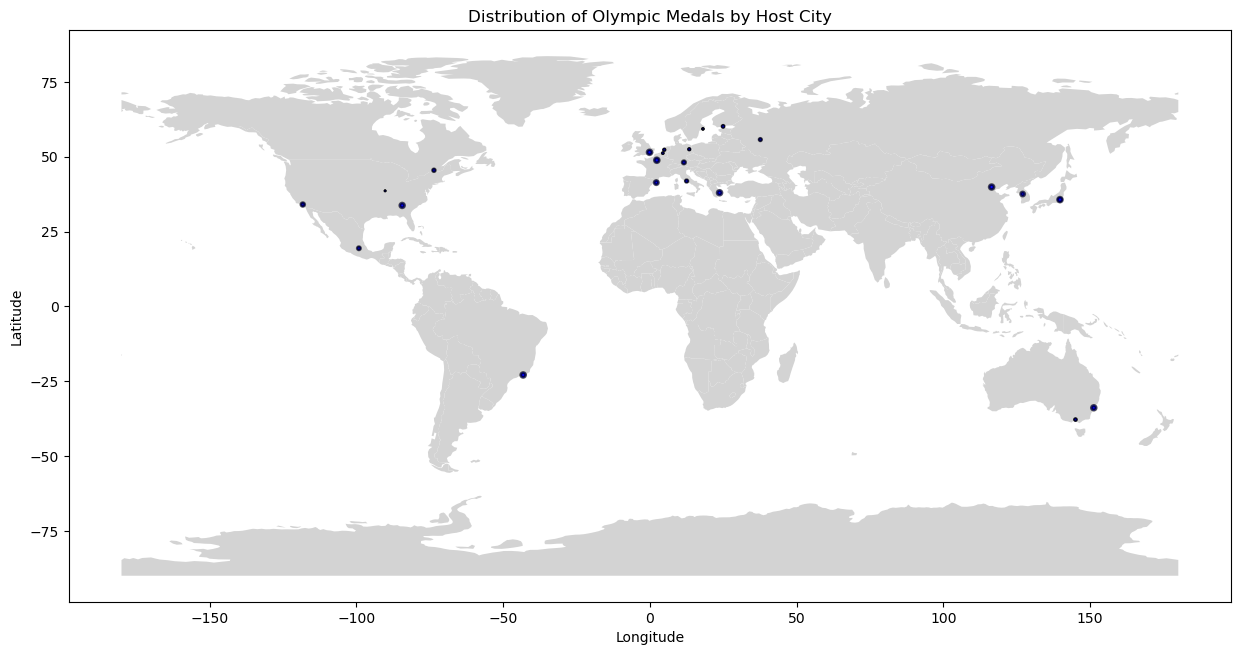

In [31]:

# Add coordinates for each city (latitude and longitude)
city_coordinates = {
    'Barcelona': (41.3851, 2.1734),
    'London': (51.5074, -0.1278),
    'Antwerpen': (51.2194, 4.4025),
    'Paris': (48.8566, 2.3522),
    'Los Angeles': (34.0522, -118.2437),
    'Helsinki': (60.1695, 24.9354),
    'Sydney': (-33.8688, 151.2093),
    'Atlanta': (33.7490, -84.3880),
    'Stockholm': (59.3293, 18.0686),
    'Beijing': (39.9042, 116.4074),
    'Rio de Janeiro': (-22.9068, -43.1729),
    'Athina': (37.9838, 23.7275),
    'Mexico City': (19.4326, -99.1332),
    'Munich': (48.1351, 11.5820),
    'Seoul': (37.5665, 126.9780),
    'Berlin': (52.5200, 13.4050),
    'Melbourne': (-37.8136, 144.9631),
    'Roma': (41.9028, 12.4964),
    'Amsterdam': (52.3676, 4.9041),
    'Montreal': (45.5017, -73.5673),
    'Moskva': (55.7558, 37.6173),
    'Tokyo': (35.6895, 139.6917),
    'St. Louis': (38.6270, -90.1994)
}

# Map the coordinates to the city
medal_city['Coordinates'] = medal_city['City'].map(city_coordinates)

# Split the coordinates into separate Latitude and Longitude columns
medal_city['Latitude'] = medal_city['Coordinates'].apply(lambda x: x[0] if pd.notnull(x) else None)
medal_city['Longitude'] = medal_city['Coordinates'].apply(lambda x: x[1] if pd.notnull(x) else None)

# Drop rows without coordinates
medal_city = medal_city.dropna(subset=['Latitude', 'Longitude'])

# Load world map data from GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Convert the DataFrame to a GeoDataFrame
gdf = gpd.GeoDataFrame(
    medal_city,
    geometry=gpd.points_from_xy(medal_city.Longitude, medal_city.Latitude),
    crs="EPSG:4326"
)

# Plot the world map
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

# Plot the medals data
gdf.plot(ax=ax, color='blue', markersize=gdf['Medal_Count'] / 10, alpha=0.6, edgecolor='k')

# Add title and labels
plt.title("Distribution of Olympic Medals by Host City")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

# Show plot
plt.show()

## The visuals offer insights into the global landscape of Olympic medal distribution. The second visual, a world map, depicts the distribution of Olympic host cities. The majority of host cities are clustered in North America, Europe, and Asia, reflecting historical and political factors influencing their selection. However, there's a growing presence of host cities in Asia, indicating a shift in the geographic landscape of Olympic Games.

## In conclusion, these visuals highlight the global reach of the Olympic movement while certain regions and sports have historically dominated, the landscape is evolving, with emerging nations and sports gaining prominence. 

## Athlete Participation Trends

In [32]:
# Question: How has the number of athletes participating in the Olympics changed
# what is the trend for different countries?

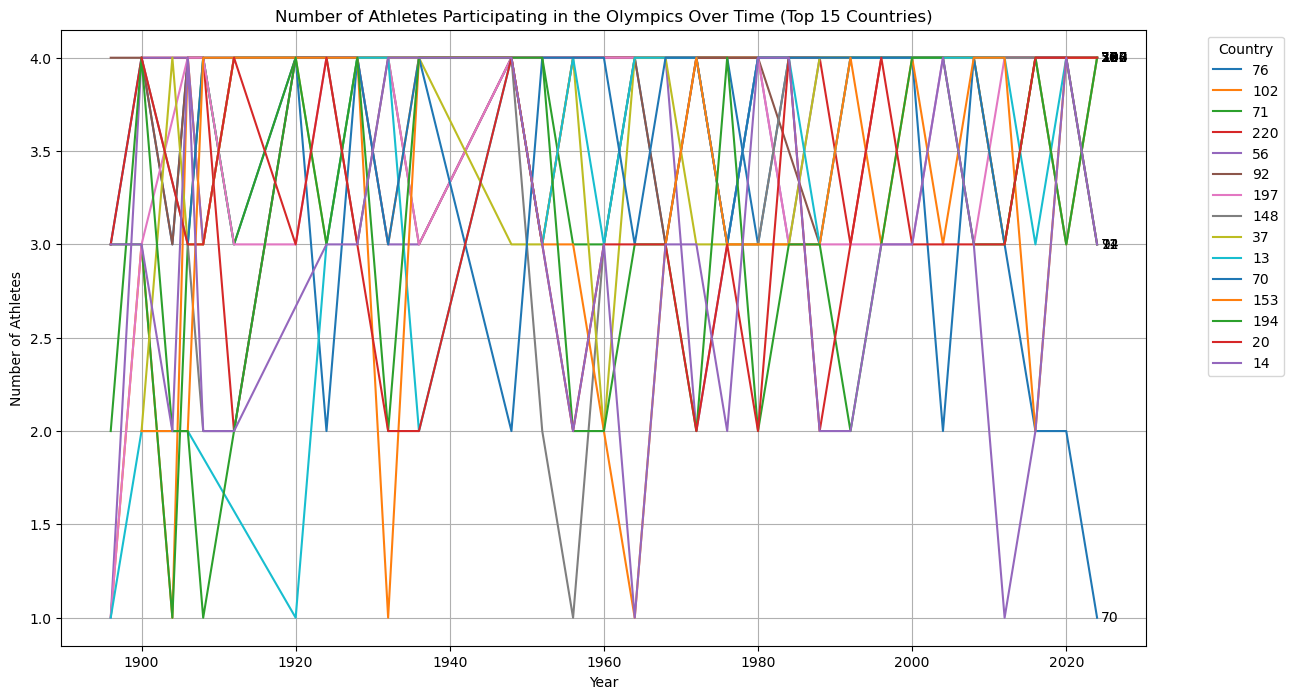

In [83]:
# Group by Year and NOC to count the number of athletes per country per year
athletes_country = df.groupby(['Year', 'NOC'])['Name'].nunique().reset_index()
athletes_country.columns = ['Year', 'NOC', 'Name']

# Identify the top 15 countries with the most athletes across all years
top_countries = athletes_country.groupby('NOC')['Name'].sum().nlargest(15).index

# Filter data for only these top 15 countries
top_countries_data = athletes_country[athletes_country['NOC'].isin(top_countries)]

# Plot the trends for the top 15 countries
plt.figure(figsize=(14, 8))
for country in top_countries:
    country_data = top_countries_data[top_countries_data['NOC'] == country]
    plt.plot(country_data['Year'], country_data['Name'], label=country)

# Adding country labels to the right of the lines
for country in top_countries:
    country_data = top_countries_data[top_countries_data['NOC'] == country]
    plt.text(country_data['Year'].max() + 0.5, 
             country_data['Name'].iloc[-1], 
             country, 
             verticalalignment='center')

plt.title('Number of Athletes Participating in the Olympics Over Time (Top 15 Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

## The chart illustrates the trend in the number of athletes participating in the Olympics over time for the top 15 countries. The general trend is an increase, reflecting the growing popularity and global reach of the games. However, individual countries exhibit different patterns, with some consistently maintaining a high number of athletes while others experience fluctuations. The chart highlights the diverse range of countries involved in the Olympics and the dynamic nature of athlete participation.

# Main Objective: Comparative analysis of different countries' achievements

## Medal Distribution by Medal Type

In [36]:
# Question: How are medals distributed among Gold, Silver, and Bronze for different countries?

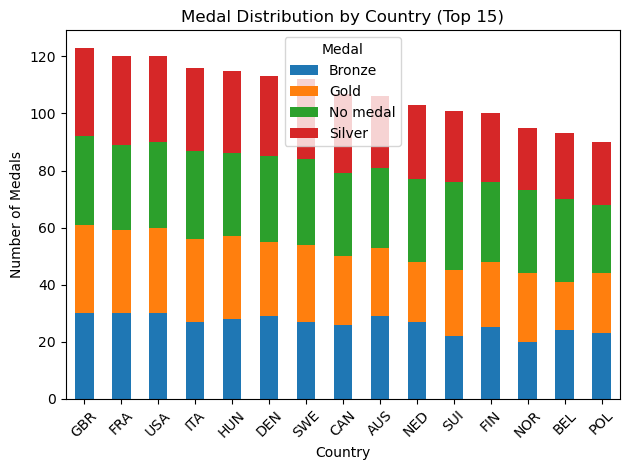

In [37]:
# Pivot the table to show counts of each medal type per country.
# Use a stacked bar chart to visualize the distribution of medal types for top countries.
medal_distribution = df.groupby(['NOC', 'Medal']).size().unstack().fillna(0)
# Calculate the total number of medals per country
medal_distribution['Total'] = medal_distribution.sum(axis=1)

# Select the top 15 countries with the most medals
top_15_countries = medal_distribution.sort_values(by='Total', ascending=False).head(15)

# Drop the 'Total' column for plotting
top_15_countries = top_15_countries.drop(columns='Total')

# Plot the medal distribution for the top 15 countries
top_15_countries.plot(kind='bar', stacked=True, title='Medal Distribution by Country (Top 15)')
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

## This shows the number of medals for top 15 countries. This indicates that GBR and FRA had the highest models followed by USA and Italy. Also, all the top countries have more than 110 medals. The countries ranked second through tenth have relatively close medal counts, suggesting a competitive landscape.¶

## The chart reveals that while some countries excel in specific medal categories, others have a more balanced distribution. For example, the United States has a high number of gold medals, while countries like Canada (CAN) and Australia (AUS) demonstrate a more balanced mix of gold, silver, and bronze. The analysis suggests that Great Britain has a strong athletic program capable of producing top-level athletes in various sports. European countries also demonstrate a high level of athletic performance, with a focus on diverse medal categories. 

## Top Performing Countries in Specific Sports

In [38]:
# Question: Which countries excel in specific sports?

In [39]:
# Group the data by Sport and NOC to count medals.
sport_performance = df.groupby(['Sport', 'NOC'])['Medal'].count().unstack().fillna(0)

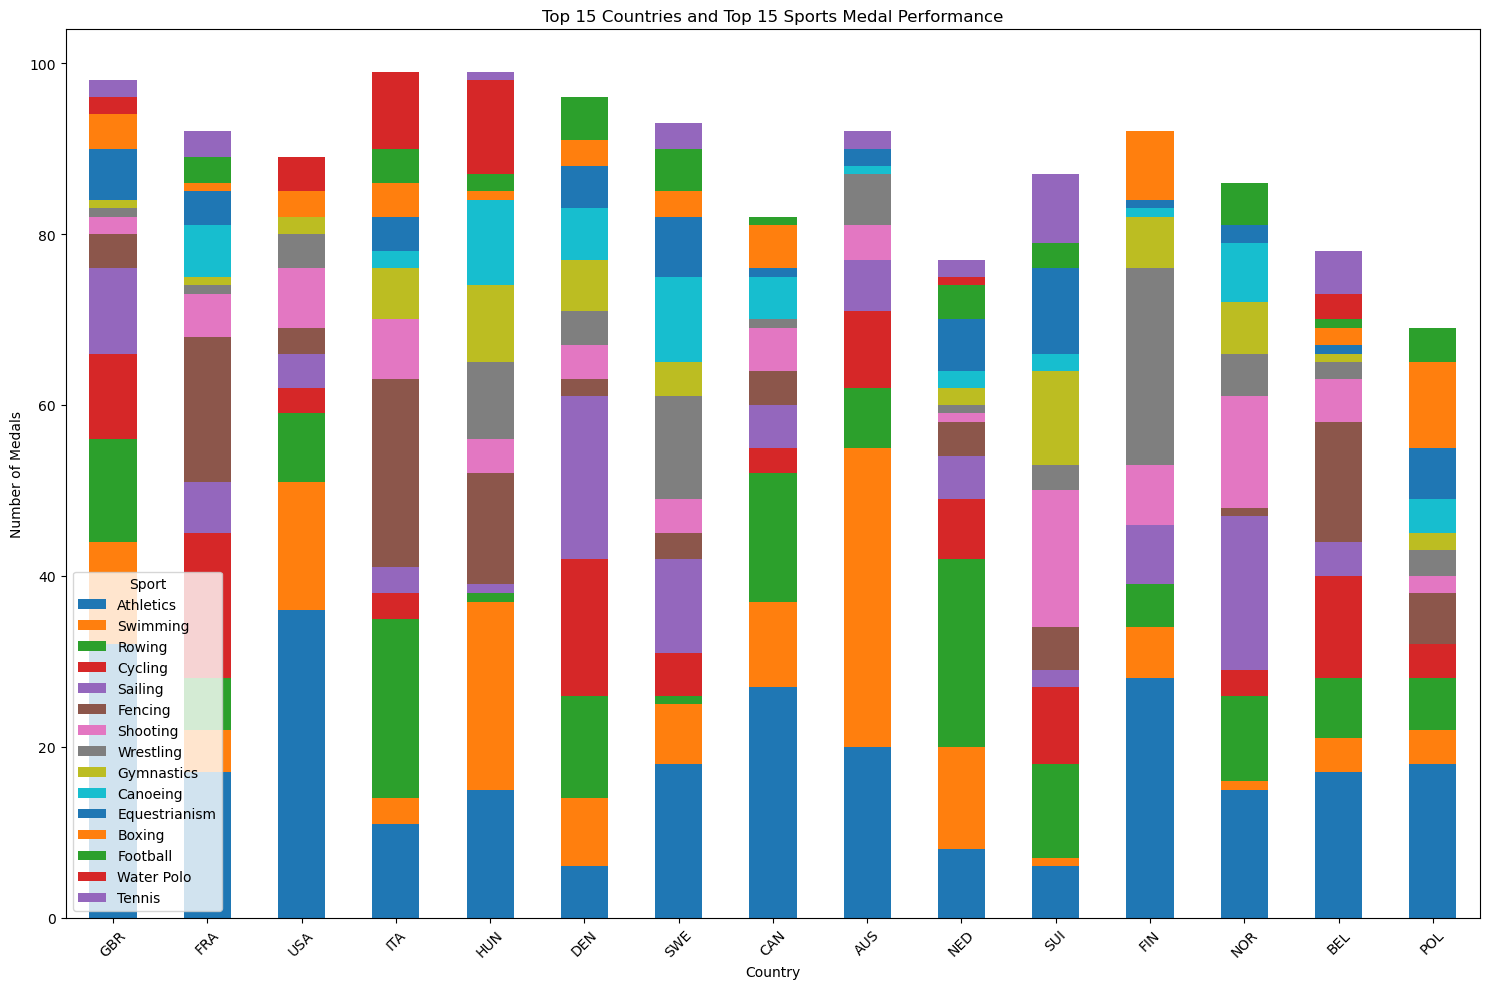

In [40]:
# Group by NOC (country) and Sport to count medals
sport_performance = df.groupby(['NOC', 'Sport']).size().unstack().fillna(0)

# Calculate the total number of medals per country
sport_performance['Total'] = sport_performance.sum(axis=1)

# Select the top 15 countries with the most medals
top_countries = sport_performance.sort_values(by='Total', ascending=False).head(15).index

# Filter the data to include only the top 15 countries
filtered_data = df[df['NOC'].isin(top_countries)]

# Group by Sport to get the total number of medals for each sport
sport_totals = filtered_data.groupby('Sport').size().sort_values(ascending=False).head(15).index

# Pivot the data to get the medal counts for the top 15 countries and top 15 sports
pivot_df = filtered_data[filtered_data['Sport'].isin(sport_totals)]
pivot_df = pivot_df.groupby(['NOC', 'Sport']).size().unstack().fillna(0)

# Filter the pivoted data to include only the top 15 countries and top 15 sports
pivot_df = pivot_df.loc[top_countries, sport_totals]

# Plot the sport performance for the top 15 countries and top 15 sports
pivot_df.plot(kind='bar', stacked=True, figsize=(15, 10), title='Top 15 Countries and Top 15 Sports Medal Performance')
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

## The stacked bar chart illustrates the medal performance of the top 15 countries across the top 15 sports. Italy and Hungary leads in the overall medal count, with a diverse range of sporting strengths. European countries also demonstrate strong performances. Some countries exhibit specialization in particular sports, while others have a more balanced approach. Emerging nations like China and South Korea are gaining prominence. Some countries exhibit specialization in particular sports. For example, Russia excels in Wrestling and Gymnastics, while Australia (AUS) dominates in Swimming and Cycling.

## Medal Trends Over Time by Country

In [41]:
#Question: How has the medal-winning performance of countries changed over the years?

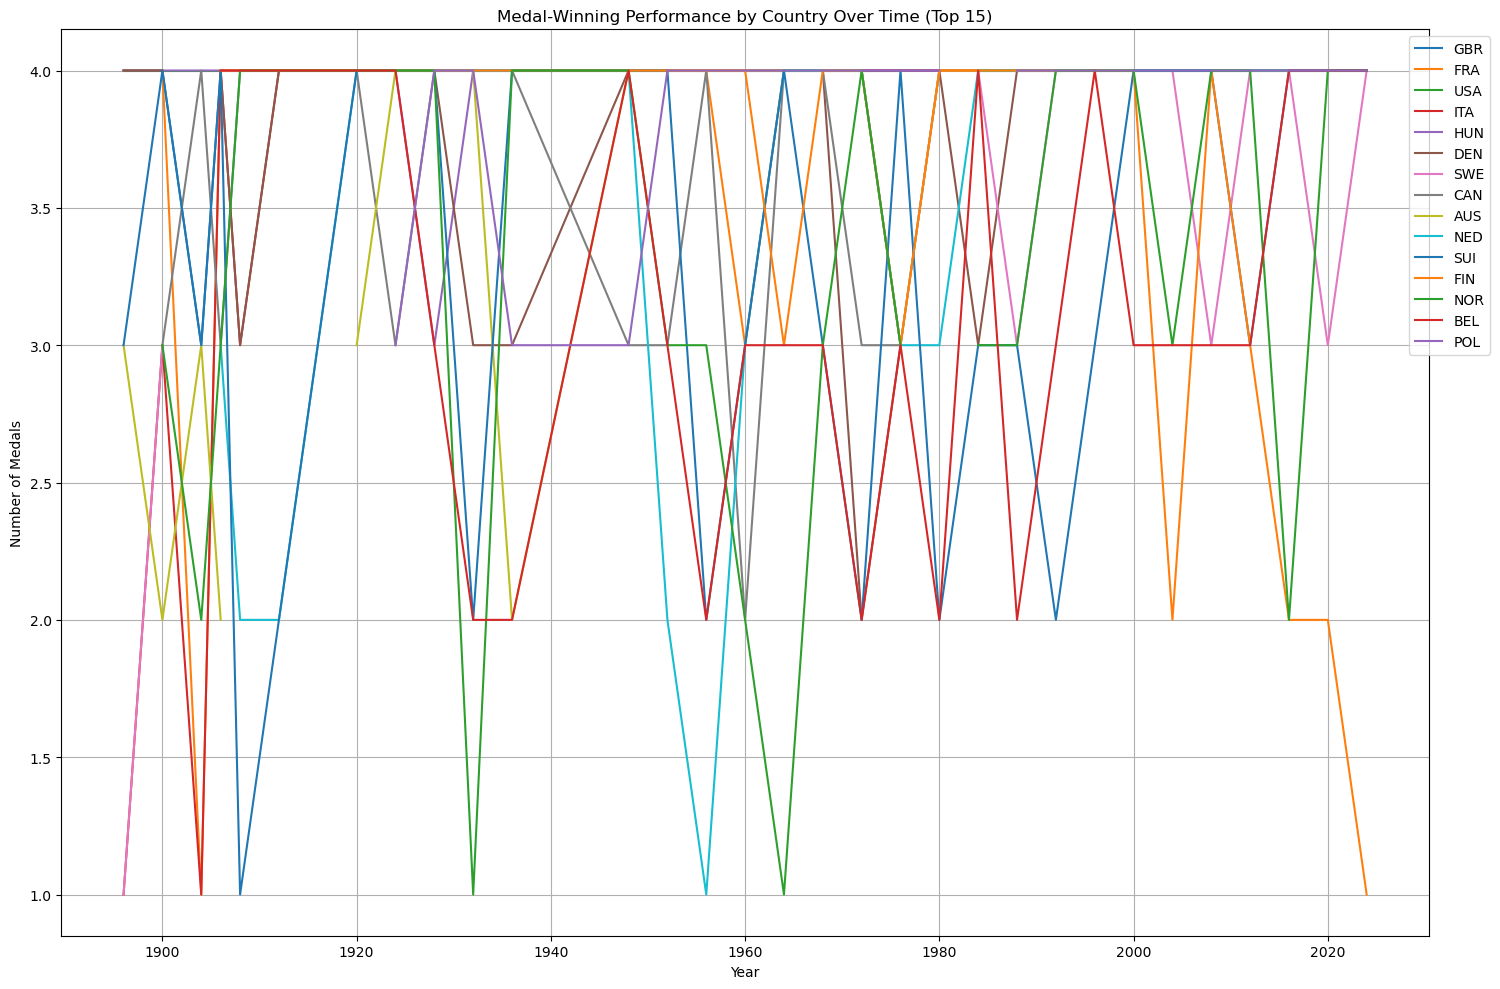

In [42]:
# Group by Year and NOC to count medals
medal_counts = df.groupby(['Year', 'NOC']).size().reset_index(name='Medal_Count')

# Calculate the total number of medals per country
total_medals_by_country = medal_counts.groupby('NOC')['Medal_Count'].sum().reset_index()

# Select the top 15 countries with the most medals
top_15_countries = total_medals_by_country.sort_values(by='Medal_Count', ascending=False).head(15)['NOC']

# Filter the data for these top 15 countries
filtered_medal_counts = medal_counts[medal_counts['NOC'].isin(top_15_countries)]

# Pivot the data to have Years as rows and NOCs as columns
pivot_df = filtered_medal_counts.pivot_table(index='Year', columns='NOC', values='Medal_Count', aggfunc='sum')

# Plotting
plt.figure(figsize=(15, 10))

# Plot a line chart for each country
for country in top_15_countries:
    plt.plot(pivot_df.index, pivot_df[country], label=country)

plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medal-Winning Performance by Country Over Time (Top 15)')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()

## The graph shows the trend in the number of athletes participating in the Olympics over time for the top 15 countries. Each line represents a different country, illustrating how their participation numbers have evolved from one Olympic Games to another. Notably, countries such as the United States, China, and Russia tend to have the highest participation numbers, reflecting their substantial investment in sports infrastructure and athlete development.

## Several countries exhibit significant growth in participation over the years. For instance, China’s increasing numbers highlight its strategic focus on expanding its Olympic sports programs, especially since hosting the 2008 Beijing Olympics, which boosted its sports prominence. On the other hand, some countries show a more stable or fluctuating trend, possibly due to changes in their national sports policies, economic conditions, or political situations.

## The variations in participation trends among these top countries can be attributed to differing levels of emphasis on Olympic sports. Countries with a strong Olympic tradition and substantial funding, like the United States and Russia, maintain high and consistent participation rates. In contrast, countries with developing sports programs may experience more variability in their participation numbers, reflecting ongoing adjustments and growth phases in their sports systems.

## Overall, it reflects how investments in sports, national priorities, and historical contexts shape each country's Olympic involvement. 

## Medal Success Rate by Country

In [43]:
# Question: What is the success rate (i.e., the proportion of medals to total events participated in) for each country?

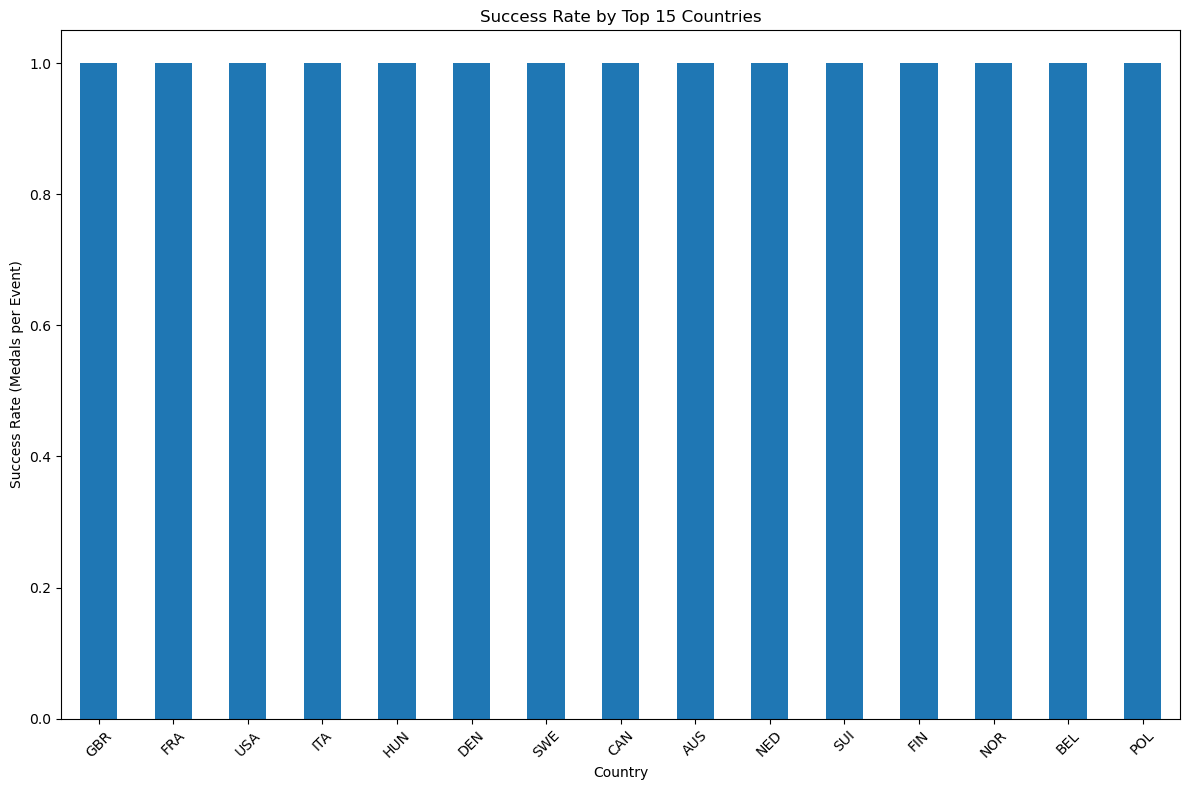

In [44]:
# Each bar represents a country, and the uniformity across the bars suggests that all these countries have nearly identical success rates, 
# close to 1.0, meaning they generally win a medal in almost every event they participate in.
# Calculate the success rate as the ratio of the number of medals to the total number of events entered for each country.

# Calculate the total number of medals won by each country
medal_count = df.groupby('NOC')['Medal'].count()

# Group by 'NOC' and count the number of events entered
events_count = df.groupby('NOC')['Event'].count()

# Calculate the success rate as the ratio of medals to events
success_rate = medal_count / events_count

# Select the top 15 countries with the most medals
top_15_countries = medal_count.sort_values(ascending=False).head(15).index

# Filter success rate data to include only the top 15 countries
top_15_success_rate = success_rate[top_15_countries]

# Sort the success rate in descending order
top_15_success_rate = top_15_success_rate.sort_values(ascending=False)

# Plot the success rate for the top 15 countries
top_15_success_rate.plot(kind='bar', figsize=(12, 8), title='Success Rate by Top 15 Countries')
plt.ylabel('Success Rate (Medals per Event)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## The bar chart depicts the success rate of the top 15 countries in the Olympics, measured by the ratio of medals won to events entered. This high success rate across the top 15 countries reflects the strong sports programs and resources these nations allocate towards Olympic preparation. The data likely indicates that these countries not only focus on sending a high number of athletes but also ensure their athletes are highly competitive, leading to a consistently high medal yield per event entered.

## The uniformity of the success rate indicate that the top 15 countries have optimized their selection processes, focusing on sports where they have historically performed well, thus maintaining a high probability of winning medals. This strategy might involve rigorous training programs, advanced sports science, and substantial financial investments to maintain their athletes' competitive edge.

## In summary, the chart emphasizes the dominance of these top 15 countries in Olympic sports, as they not only field large teams but also maintain an exceptional success rate, reflecting their overall strength and strategic focus in global sports competitions.

# Performance analytics for specific sports and events.

## Overall Medal Count by Country

In [45]:
# Question: Which countries have won the most medals overall (top 15 countries)?
# Group the data by NOC and count the number of medals for each country.

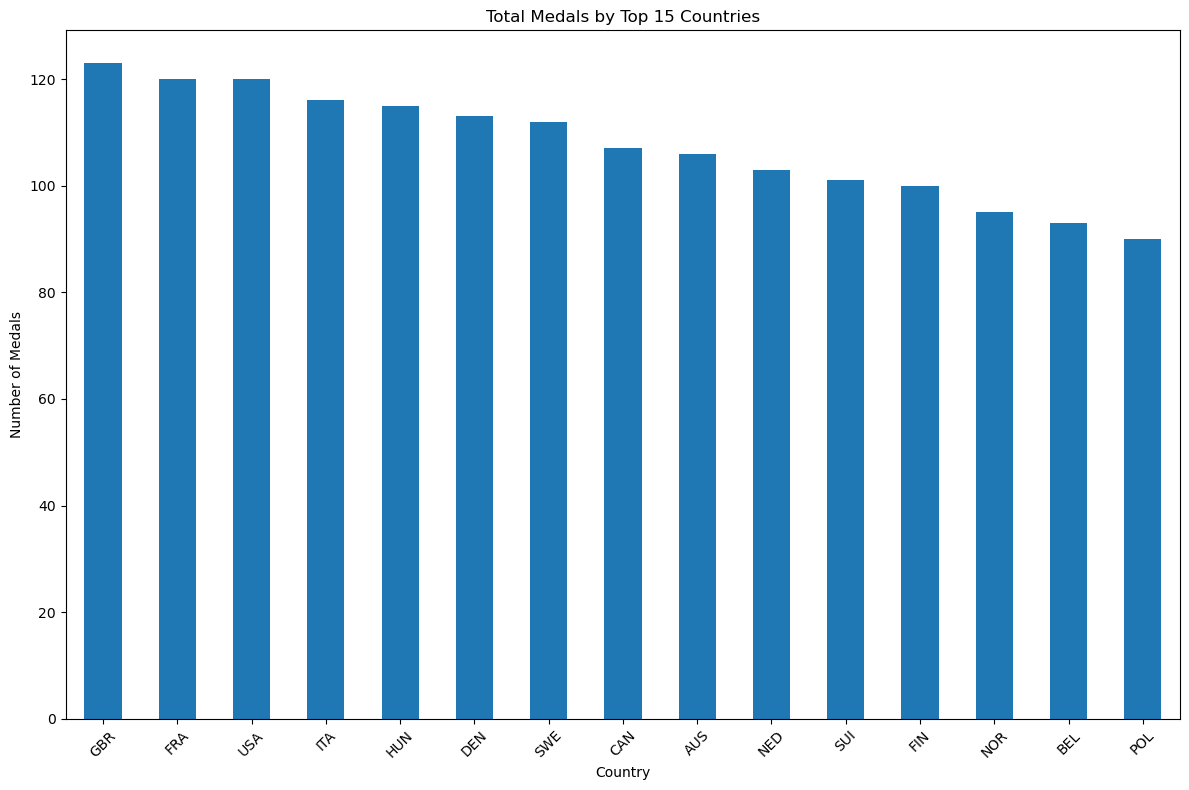

In [46]:
# Calculate the total number of medals won by each country
medal_count = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)

# Select the top 15 countries with the most medals
top_15_countries = medal_count.head(15)

# Plot the total number of medals for the top 15 countries
top_15_countries.plot(kind='bar', figsize=(12, 8), title='Total Medals by Top 15 Countries')
plt.ylabel('Number of Medals')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()       # Adjust layout to fit labels
plt.show()

## The bar chart illustrates the total number of medals won by the top 15 countries in the Olympics. Each bar represents a country, with the height of the bar corresponding to the total number of medals these countries have secured over time.

## Great Britain (GBR) leads the chart with the highest total number of medals, followed closely by France (FRA) and the United States (USA). The relatively small differences in medal counts among these top countries indicate a competitive field where several nations have consistently performed well over multiple Olympic Games.

## This distribution suggests that these countries have established themselves as dominant forces in the Olympics, often leveraging strong sports traditions, significant investments in athlete training, and the development of comprehensive support systems for their athletes. Their continued success reflects a deep-rooted commitment to excelling in various sports disciplines.

## Top 15 Performing Countries in Specific Sports

In [47]:
# Question: Which 15countries excel in specific sports?

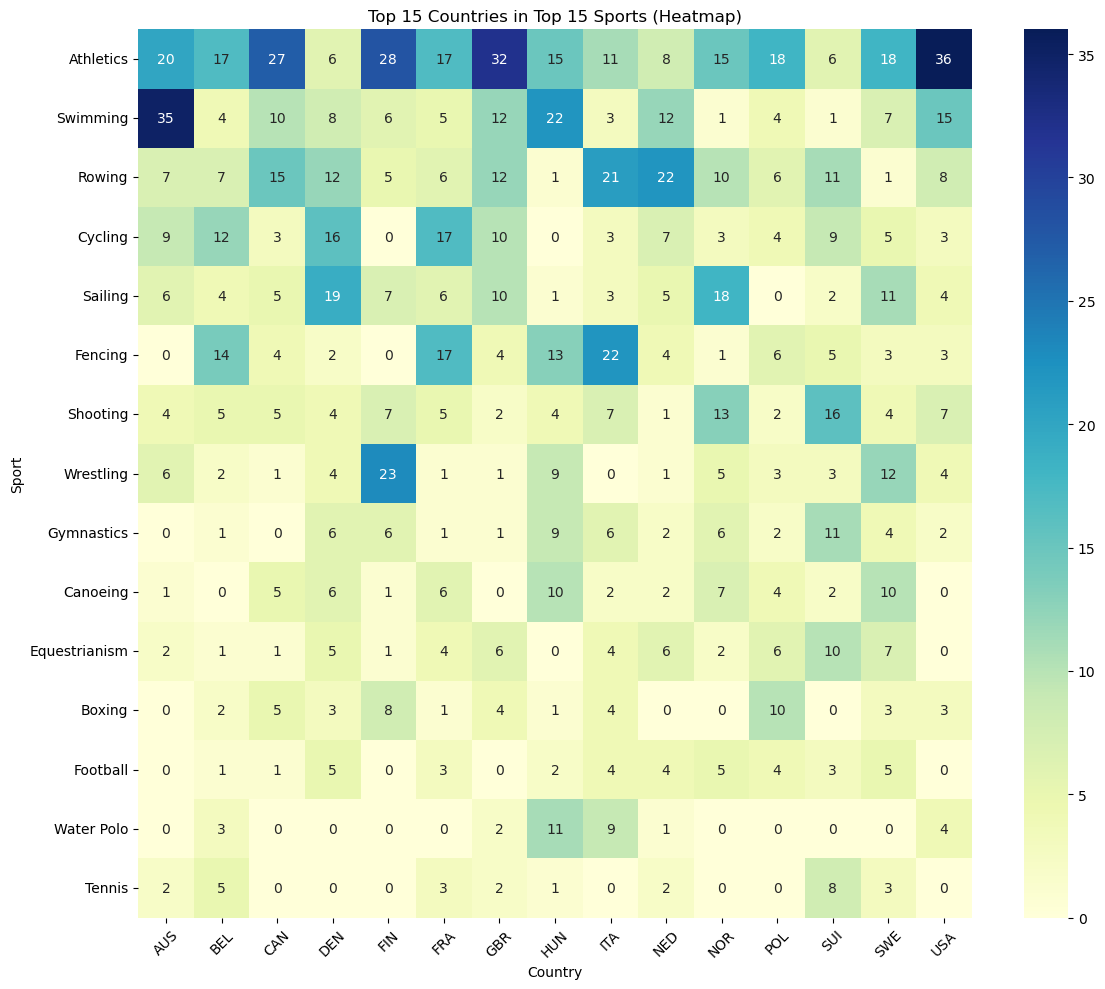

In [48]:
# Calculate the total number of medals won by each country
medal_count = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)

# Select the top 15 countries with the most medals
top_15_countries = medal_count.head(15).index

# Group by Sport and NOC to count medals
sport_performance = df[df['NOC'].isin(top_15_countries)].groupby(['Sport', 'NOC']).size().unstack().fillna(0)

# Select the top sports based on total medals
top_sports = sport_performance.sum(axis=1).sort_values(ascending=False).head(15).index

# Filter the data to include only the top 15 sports
filtered_sport_performance = sport_performance.loc[top_sports]

# Plotting

# Heatmap to show which countries are leading in each sport
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_sport_performance, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Top 15 Countries in Top 15 Sports (Heatmap)')
plt.ylabel('Sport')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

## The heatmap chart you provided offers a comprehensive overview of the performance of the top 15 countries in various Olympic sports. 

## Dominant Countries: The chart highlights that countries like the USA, Australia, and Germany consistently perform well across multiple sports. For instance, the USA shows strong performance in athletics, swimming, and gymnastics, while Australia excels in swimming and rowing.

## Sport-Specific Dominance: Certain countries dominate specific sports. For example, Hungary shows a strong presence in water polo, while the Netherlands excels in cycling and rowing. This specialization can be attributed to historical, cultural, and infrastructural factors that favor these sports in these countries.

## Overall Trends: This reveals overall trends in Olympic performance, such as the dominance of European countries in fencing and rowing, and the strong presence of the USA and Australia in swimming. These trends reflect the investment and emphasis placed on these sports by the respective countries.

## Strategic Insights: For countries aiming to improve their Olympic performance, this chart can serve as a strategic tool. By analyzing the strengths and weaknesses of top-performing countries, emerging nations can identify areas for improvement and allocate resources more effectively to enhance their competitiveness in the global arena.

## Medal Distribution by Event within a Sport

In [49]:
# Question: How are medals distributed among different events within a specific sport?

In [50]:
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,M,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,No medal
1,1,A Lamusi,M,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,No medal
2,2,Gunnar Aaby,M,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,No medal
3,3,Edgar Aabye,M,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,26,Cornelia (-strannood),F,Netherlands,NED,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,No medal


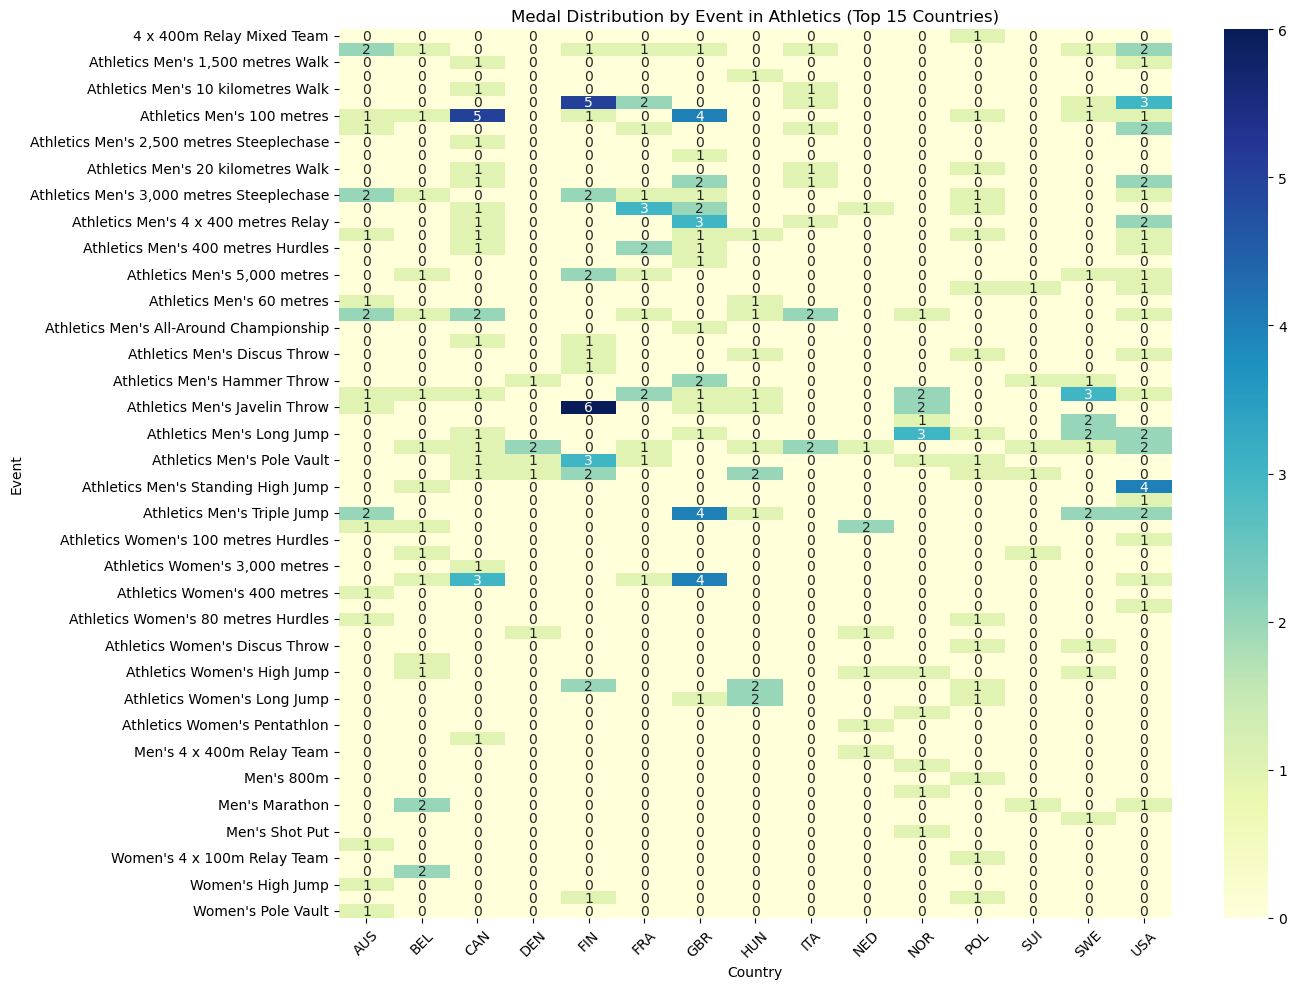

In [51]:
# Define the sport you want to analyze
specific_sport = 'Athletics'  # sport interested in

# Calculate the total number of medals won by each country
medal_count = df.groupby('NOC')['Medal'].count().sort_values(ascending=False)

# Select the top 15 countries with the most medals
top_15_countries = medal_count.head(15).index

# Filter the dataset for the specific sport and top 15 countries
sport_data = df[(df['Sport'] == specific_sport) & (df['NOC'].isin(top_15_countries))]

# Group by Event and NOC to count medals
event_distribution = sport_data.groupby(['Event', 'NOC']).size().unstack().fillna(0)

# Plotting

# Heatmap to show medal distribution among events
plt.figure(figsize=(14, 10))
sns.heatmap(event_distribution, cmap='YlGnBu', annot=True, fmt='g')
plt.title(f'Medal Distribution by Event in {specific_sport} (Top 15 Countries)')
plt.ylabel('Event')
plt.xlabel('Country')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

## The graph provided illustrates the distribution of medals won by the top 15 countries in various athletics events at the Olympics. Each cell represents the number of medals won, with darker shades indicating higher counts. 

## Dominant Countries: The chart highlights that countries like the USA, Jamaica, and Kenya consistently perform well in athletics. The USA shows strong performance across multiple events, including sprints and relays, while Jamaica excels in sprinting events, and Kenya dominates in long-distance running.

## Event-Specific Dominance: Certain countries dominate specific events. For example, Canada shows strong in the 100m Men, while Finland in Javelin Throw (Men). 

## Overall Trends: The chart reveals overall trends in Olympic athletics performance, such as the dominance of African countries in long-distance running and the strong presence of the USA in a wide range of events. These trends reflect the investment and emphasis placed on these sports by the respective countries.

## Strategic Insights: For countries aiming to improve their Olympic athletics performance, this chart can serve as a strategic tool. By analyzing the strengths and weaknesses of top-performing countries, emerging nations can identify areas for improvement and allocate resources more effectively to enhance their competitiveness in the global arena.

## Performance Comparison by Gender in Specific Sports

In [52]:
# Question: How do male and female athletes compare in terms of medal counts in a specific sport?

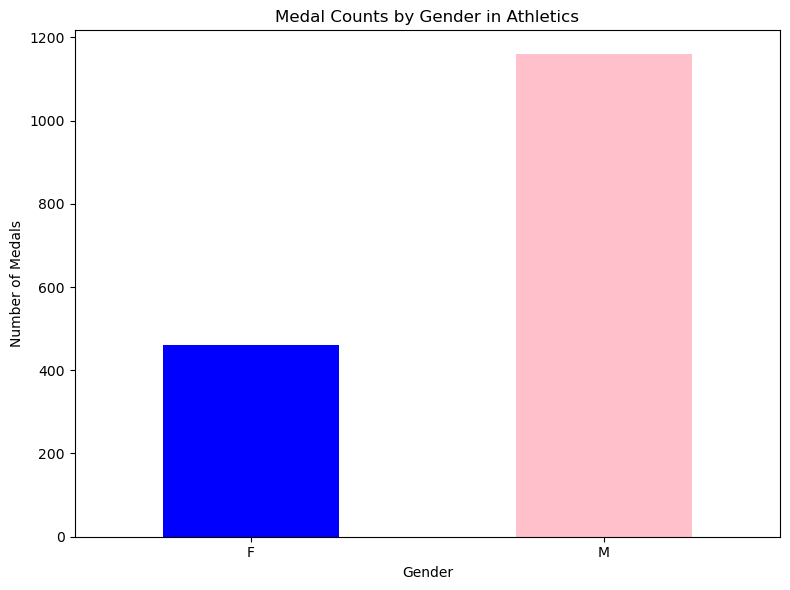

In [53]:
# Define the sport you want to analyze
specific_sport = 'Athletics'  # Sport interested in

# Filter the dataset for the specific sport
sport_data = df[df['Sport'] == specific_sport]

# Group by Gender to count medals
gender_medal_count = sport_data.groupby('Sex')['Medal'].count()

# Plotting

# Bar chart to compare medal counts by gender
plt.figure(figsize=(8, 6))
gender_medal_count.plot(kind='bar', color=['blue', 'pink'])
plt.title(f'Medal Counts by Gender in {specific_sport}')
plt.ylabel('Number of Medals')
plt.xlabel('Gender')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()

## The bar chart titled “Medal Counts by Gender in Athletics” highlights the disparity in medal counts between male and female athletes in Olympic athletics. Male athletes have won significantly more medals, with their count exceeding 1000, while female athletes have won around 400 medals.

## This disparity could be attributed to several factors, including historical gender biases in sports, differences in the number of events available for each gender, and varying levels of support and investment in female athletics over the years. Historically, male athletes have had more opportunities to compete and excel in athletics, leading to a higher medal count.

## In recent years, there has been a push towards gender equality in sports, with more events being added for female athletes and increased support for women’s athletics. This trend is expected to continue, potentially reducing the disparity in medal counts in future Olympic Games.

## Overall, the chart underscores the importance of continued efforts to promote gender equality in sports, ensuring that female athletes receive the same opportunities, support, and recognition as their male counterparts. 

## Medal-Winning Patterns in High-Profile Events

In [54]:
# Question: Are there specific high-profile events within a sport that consistently attract more medals?

In [55]:
# Group by Event to count medals
event_medal_counts = sport_data.groupby('Event')['Medal'].count().sort_values(ascending=False)

# Show the top events by medal count
print(event_medal_counts.head(10))


Event
Athletics Men's 100 metres              169
Athletics Men's Marathon                120
Athletics Men's 800 metres               76
Athletics Women's 100 metres             71
Athletics Men's 400 metres               65
Athletics Men's 5,000 metres             48
Athletics Men's 200 metres               46
Athletics Men's 4 x 100 metres Relay     42
Athletics Men's 1,500 metres             42
Athletics Men's 10,000 metres            41
Name: Medal, dtype: int64


## The data provided highlights the participation numbers in various athletics events at the Olympics, with the Men's 100 metres leading by a significant margin at 169 participants, followed by the Men's Marathon with 120 participants. This indicates the popularity and significance of the Men's 100 metres, often regarded as the pinnacle of Olympic athletics. The event's status as one of the most anticipated competitions, often determining the fastest human, attracts a large number of athletes from across the globe.

## The Men's Marathon, with 120 participants, underscores its enduring appeal and the prestige associated with winning this grueling long-distance event. The marathon, steeped in historical significance, is not only a test of speed but also of endurance, strategy, and mental toughness, drawing athletes who excel in long-distance running.

## Other events, such as the Men's 800 metres, Women's 100 metres, and Men's 400 metres, also feature prominently in terms of participation. The diversity of events with high participation reflects the wide range of athletic talents showcased at the Olympics, from sprinting and middle-distance running to relay races. The inclusion of the Women's 100 metres highlights the growing emphasis on gender equality in athletics, with female athletes increasingly competing at the highest levels in recent years.

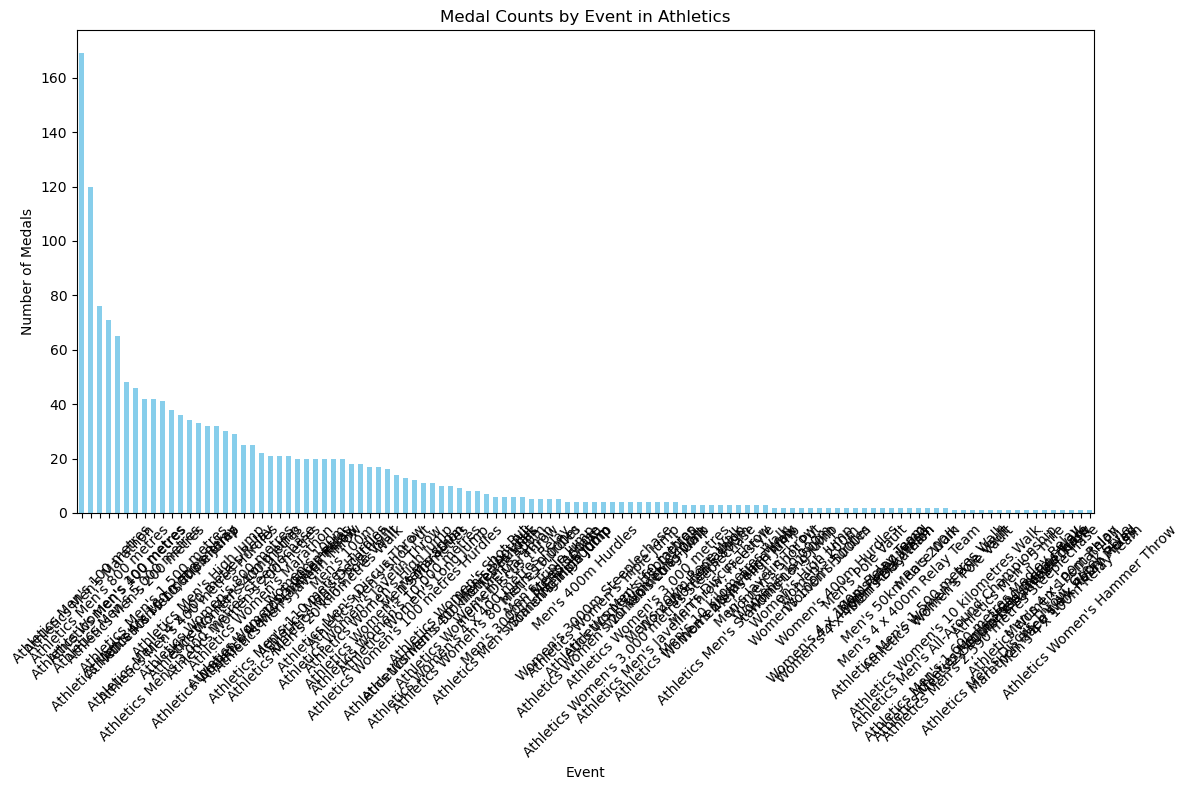

In [56]:
# Plotting: Visualize Medal Distribution by Event
plt.figure(figsize=(12, 8))
event_medal_counts.plot(kind='bar', color='skyblue')
plt.title(f'Medal Counts by Event in {specific_sport}')
plt.ylabel('Number of Medals')
plt.xlabel('Event')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.tight_layout()
plt.show()


## The bar graph provides a clear visual representation of the distribution of medals across various athletic events in the Olympics. 

## Popular Events: Events like the 100m sprint and marathon have higher medal counts, reflecting their long-standing presence and popularity in the Olympics. These events often attract top athletes and significant media attention, contributing to their high medal tallies.

## Event Longevity: The number of medals in each event can also indicate how long the event has been part of the Olympics. Traditional events like the 100m sprint have accumulated more medals over time compared to newer events.

## Strategic Planning: For athletes and national teams, understanding which events offer more medal opportunities can help in strategic planning and resource allocation. Focusing on events with higher medal counts might increase their chances of winning.

## Evolution of Sports: The graph also highlights the evolution of Olympic sports, with some events gaining prominence and others being phased out. This dynamic nature of the Olympics ensures that the Games remain relevant and exciting for both athletes and spectators.

<Figure size 1400x1000 with 0 Axes>

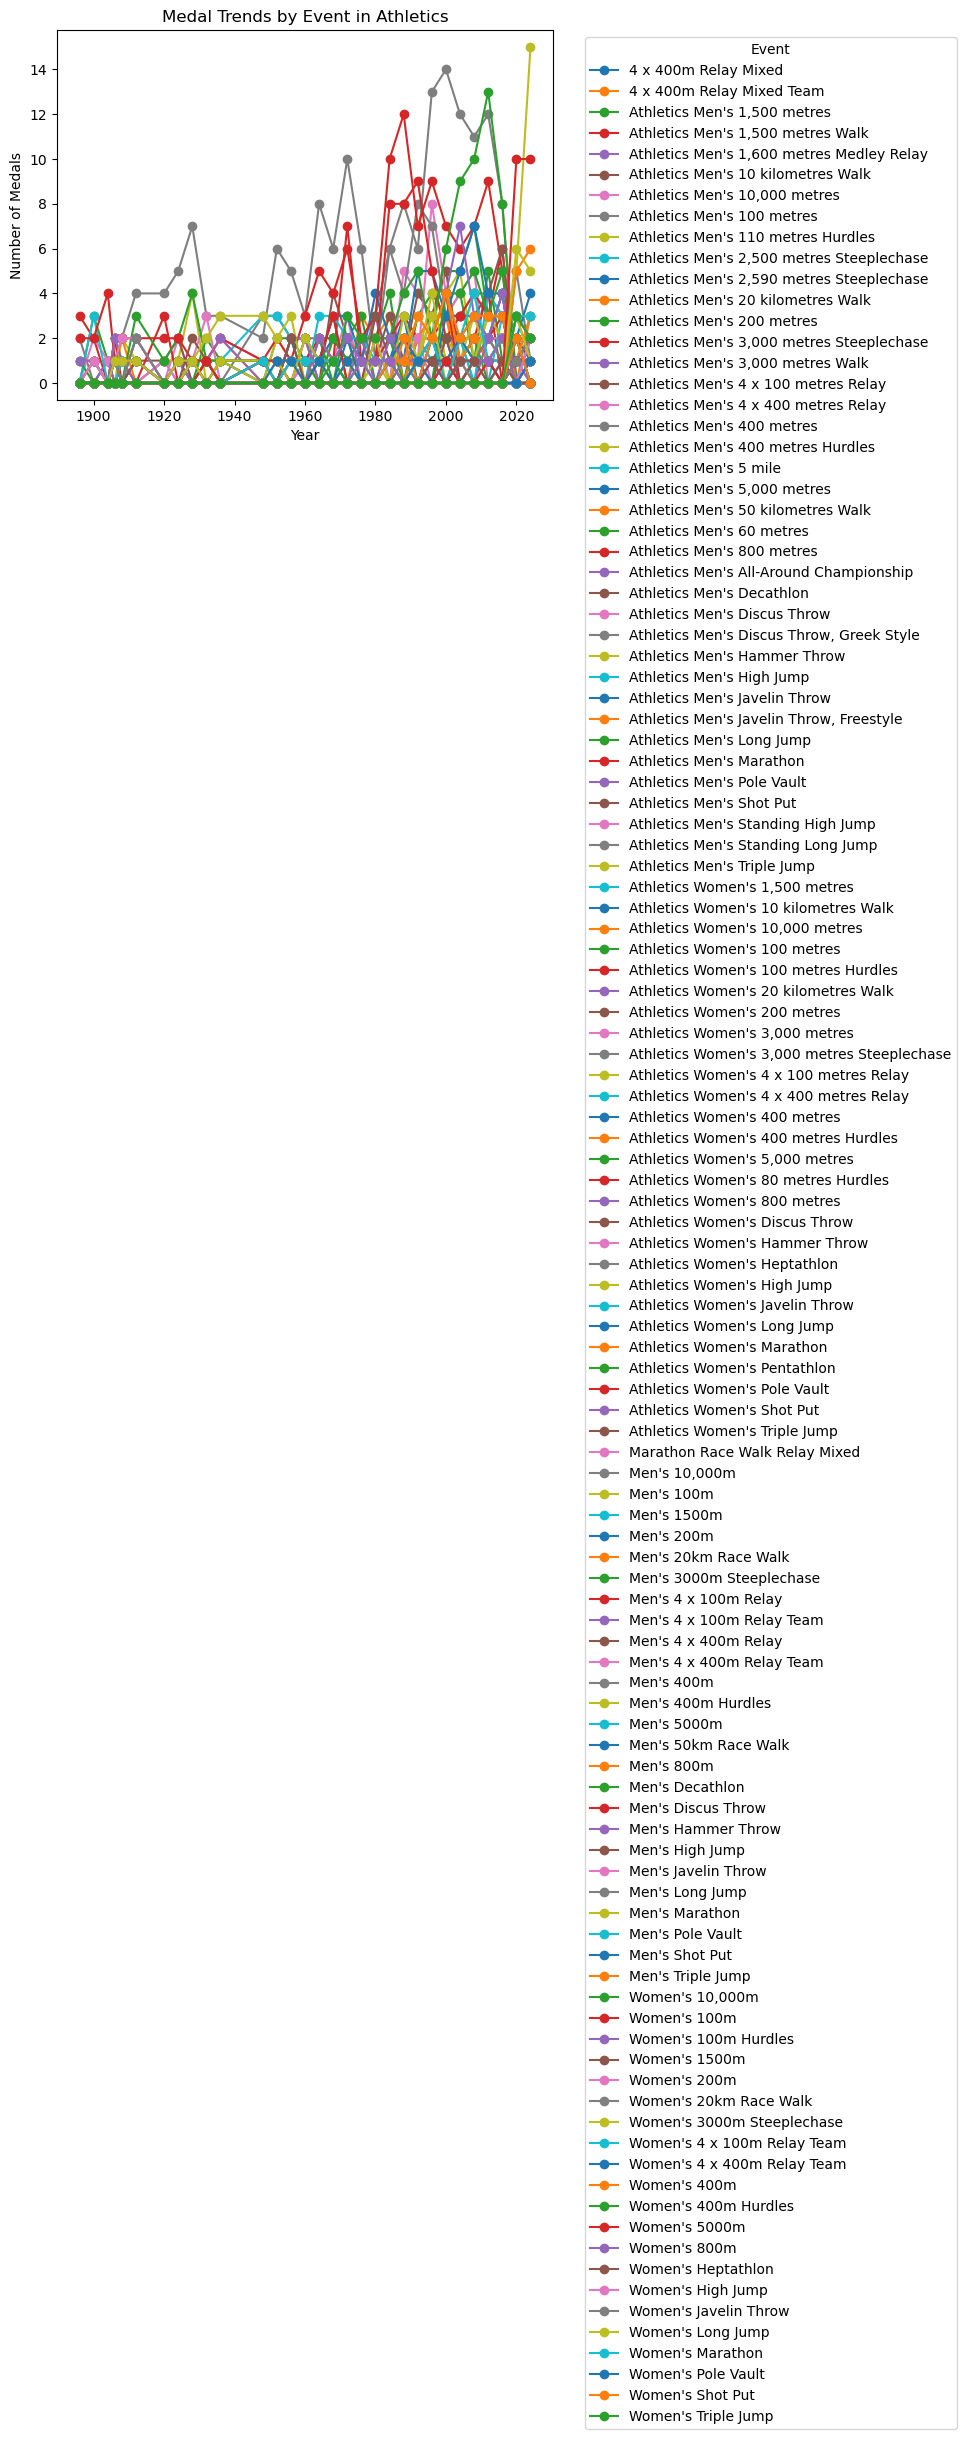

In [57]:
# Analyze Trends Over Time
# Group by Year and Event to count medals
event_medal_trends = sport_data.groupby(['Year', 'Event'])['Medal'].count().unstack().fillna(0)

# Plotting
plt.figure(figsize=(14, 10))
event_medal_trends.plot(kind='line', marker='o')
plt.title(f'Medal Trends by Event in {specific_sport}')
plt.ylabel('Number of Medals')
plt.xlabel('Year')
plt.legend(title='Event', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## The graph provides a comprehensive overview of the distribution of medals across various athletic events in the Olympics from 1896 to 2016. 

## Event Longevity and Popularity: Events like the 100m sprint and marathon have consistently high medal counts, indicating their long-standing presence and popularity in the Olympics. These events have been staples of the Games, attracting top athletes and significant media attention.

## Evolution of Events: The graph also highlights the introduction and discontinuation of certain events. For example, newer events have lower medal counts compared to traditional ones. This evolution reflects changes in the Olympic program and the inclusion of new sports to keep the Games relevant.

## Gender Disparity: The graph may also reveal gender disparities in medal counts for certain events. Historically, male athletes have had more opportunities to compete in a wider range of events, but recent efforts towards gender equality are gradually balancing this disparity. Continued support for women’s athletics is crucial for achieving equal representation and opportunities in the Olympics.

# Correlation Analysis

In [58]:
# Preprocessing
# Convert categorical variables into numerical format using techniques such as one-hot encoding or label encoding.
# Aggregate Data

In [59]:
# Encode categorical variables to show relationship between variables
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoders = {}

# List of categorical columns to encode
categorical_columns = ['Sex', 'Team', 'NOC', 'Season', 'City', 'Sport', 'Event', 'Medal']

# Apply label encoding to each categorical column
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Check the first few rows to see the result
df.head()

,player_id,Name,Sex,Team,NOC,Year,Season,City,Sport,Event,Medal
0,0,A Dijiang,1,59,42,1992,0,4,9,111,2
1,1,A Lamusi,1,59,42,2012,0,8,36,262,2
2,2,Gunnar Aaby,1,85,56,1920,0,1,30,230,2
3,3,Edgar Aabye,1,87,56,1900,0,15,59,616,1
4,26,Cornelia (-strannood),0,224,148,1932,0,9,5,80,2


In [60]:
df_copy = df.copy() # make another copy of original dataset to remove non-important variables

In [61]:
# drop data not needed for correlation analysis

df_columns = ['Year', 'Season']

df_copy.drop(columns=df_columns, axis=1, inplace=True)

In [62]:
correlation_matrix = df_copy.corr()

# Display the correlation matrix
print(correlation_matrix)

           player_id       Sex      Team       NOC      City     Sport  \
player_id   1.000000 -0.101377 -0.017164 -0.010361  0.128231  0.002788   
Sex        -0.101377  1.000000  0.015811 -0.000032 -0.061536  0.003868   
Team       -0.017164  0.015811  1.000000  0.886875  0.013919 -0.016721   
NOC        -0.010361 -0.000032  0.886875  1.000000  0.011606 -0.014102   
City        0.128231 -0.061536  0.013919  0.011606  1.000000  0.019197   
Sport       0.002788  0.003868 -0.016721 -0.014102  0.019197  1.000000   
Event       0.145370 -0.147037 -0.021295 -0.016520  0.106596  0.844357   
Medal      -0.026706 -0.000534  0.012805  0.010274 -0.000878 -0.029444   

              Event     Medal  
player_id  0.145370 -0.026706  
Sex       -0.147037 -0.000534  
Team      -0.021295  0.012805  
NOC       -0.016520  0.010274  
City       0.106596 -0.000878  
Sport      0.844357 -0.029444  
Event      1.000000 -0.022170  
Medal     -0.022170  1.000000  


## The correlation matrix provided highlights the relationships between various variables, such as player ID, sex, team, NOC (National Olympic Committee), city, sport, event, and medal status in relation to Olympic athletes. When analyzing these correlations, particularly focusing on how they relate to winning medals, we can categorize the relationships into positive and negative correlations to better understand their significance.

## Positive Correlations: The most notable positive correlation is between Sport and Event (0.844), indicating that certain sports are strongly associated with specific events. This makes sense as different sports have multiple events, and athletes often specialize in a particular event within a sport. Additionally, there is a slight positive correlation between Team and Medal (0.0128) and NOC and Medal (0.0103), suggesting that belonging to a particular team or representing a specific country may have a small influence on winning medals. However, these correlations are weak, implying that while the team or country might play a role, it is not a strong determinant of medal success.

## Negative Correlations: On the other hand, there are some slight negative correlations, notably between Sex and Event (-0.147) and Sex and Medal (-0.0005). The negative correlation between sex and event suggests that male and female athletes might participate in different events, which could affect medal outcomes. However, the extremely weak negative correlation between sex and medal implies that sex does not significantly impact the likelihood of winning a medal, reinforcing the idea of gender equality in athletic performance at the Olympics.

## Neutral/Weak Relationships: Most correlations involving medals are close to zero, such as the correlation between Medal and City (-0.0009) or Medal and Sport (-0.0294). This suggests that factors like the host city or the specific sport may not directly influence an athlete's chances of winning a medal. These weak correlations indicate that winning a medal is likely influenced by a complex set of factors, including individual performance, training, and perhaps even chance, rather than just the variables analyzed here.

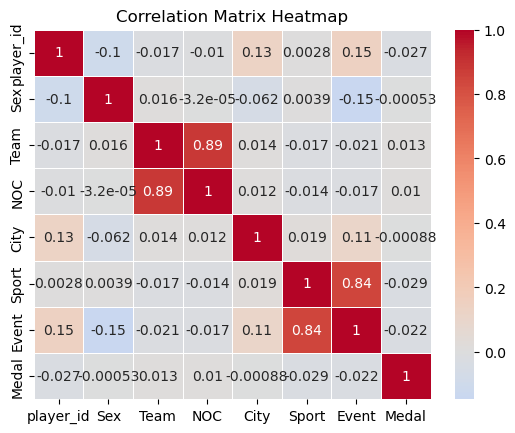

In [63]:
# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

## The Correlation Matrix Heatmap illustrates the relationships between various Olympic-related variables such as ‘player_id’, ‘Sex’, ‘Team’, ‘NOC’, ‘City’, ‘Sport’, ‘Event’, and ‘Medal’. It shows how these factors are interrelated, with positive correlations in red and negative correlations in blue. This visualization helps identify patterns, such as which teams or sports are more likely to win medals, and highlights the importance of understanding these relationships for strategic planning and analysis in Olympic sports.

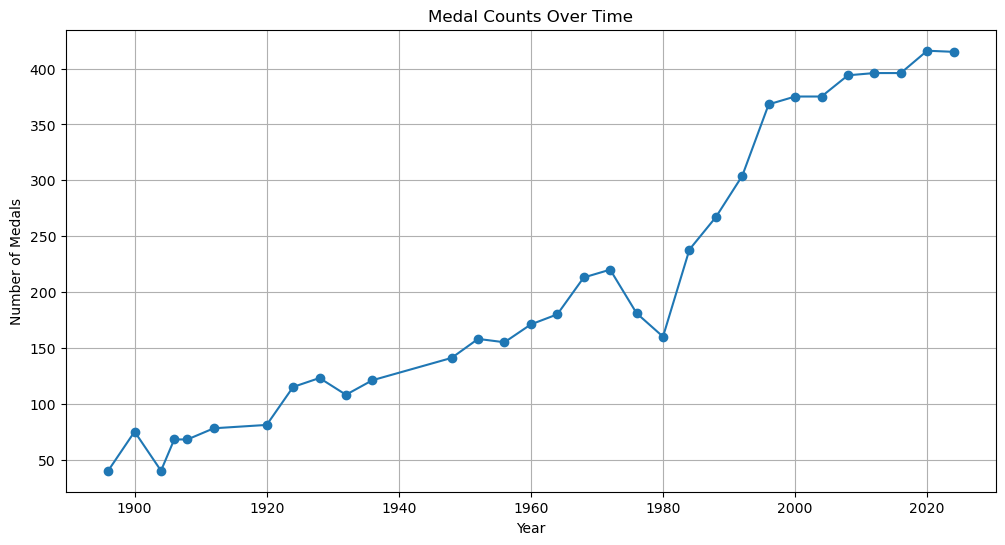

In [64]:
## Medal Trends Over Time
# Question: What are the trends in medal counts over the years?
# Aggregate medal counts by year
yearly_medals = df.groupby('Year')['Medal'].count()

# Plot the trend over years
plt.figure(figsize=(12, 6))
yearly_medals.plot(kind='line', marker='o')
plt.title('Medal Counts Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)
plt.show()

## The graph shows a general increase in the number of medals awarded at the Olympics from 1900 to 2020. This upward trend reflects the addition of new sports, more participating countries, and an increase in events within existing sports. The significant rise after 1960 indicates a period of growth, likely due to technological advancements, professionalization of athletes, and increased media coverage.

## This graph highlights the expansion and evolution of the Olympic Games, showcasing how they have grown into a major international event with broad appeal. The fluctuations in certain periods may correspond to historical events like world wars or boycotts, affecting participation and the number of events held. Overall, the graph encapsulates over a century of Olympic history and the increasing global interest in these games.

In [65]:
# skewness for all the numerical variables
df_copy.skew()

player_id    3.510698
Sex         -1.239534
Team         0.132166
NOC          0.138450
City         0.096111
Sport        0.158604
Event        0.388694
Medal       -0.487186
dtype: float64

In [66]:
df_copy.kurt()

player_id    10.831444
Sex          -0.463698
Team         -1.154561
NOC          -1.154886
City         -1.224570
Sport        -1.445668
Event        -1.249163
Medal        -0.729059
dtype: float64

## The data provided includes the skewness and kurtosis values for several variables such as player ID, sex, team, NOC, city, sport, event, and medal. Skewness measures the asymmetry of the distribution of data, while kurtosis measures the "tailedness" or the presence of outliers in the distribution.

## Skewness Analysis: The skewness values show that most variables are either slightly skewed or moderately skewed. For example, player ID has a high positive skewness (3.510698), indicating that the distribution is right-skewed with a longer tail on the right side. Conversely, sex has a negative skewness (-1.239534), meaning the distribution is left-skewed, with a longer tail on the left side. The medal variable also shows a noticeable negative skewness (-0.487186), suggesting a slight left skew in the distribution of medal data, likely indicating that a majority of athletes won fewer medals.

## Kurtosis Analysis: The kurtosis values indicate that most variables have distributions that are flatter than a normal distribution (kurtosis < 3), with negative kurtosis values for most variables. For instance, team and NOC have kurtosis values of -1.154561 and -1.154886, respectively, indicating a platykurtic distribution, which is less peaked with thinner tails, suggesting fewer outliers. However, the player ID variable has a high kurtosis (10.831444), indicating a leptokurtic distribution, meaning it has a more pronounced peak and thicker tails, suggesting a higher likelihood of outliers in player IDs. Overall, the skewness and kurtosis analyses highlight the non-normal distribution of the data, with varying degrees of skewness and outlier presence across different variables.